<a href="https://colab.research.google.com/github/namozhdehi/Pathrise/blob/main/03_EDA_Pathrise_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Exploratory Data Analysis (EDA) <a id='2_EDA'></a>

## 3.1 Contents <a id='3.1_Contents'></a>
[3. Exploratory Data Analysis (EDA)](#3_EDA)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load Data](#3.4_Load_Data)
  * [3.5 Univariate Analysis](#3.5_Univariate)
      * [3.5.1 Numerical Variables](#3.5.1_Numerical)
      * [3.5.2 Categorical Variables](#3.5.2_Categorical)
      * [3.5.3 Date Variables](#3.5.3_Date)
  * [3.6 Bivariate Analysis](#3.6_Bivariate)
      * [3.6.1 Numerical-Numerical Analysis](#3.6.1_Numerical_Numerical)
      * [3.6.2 Categorical-Numerical Analysis](#3.6.2_Categorical_Numerical)
      * [3.6.3 Categorical-Categorical Analysis](#3.6.3_Categorical_Categorical)
  * [3.7 Word Cloud for Conversations](#3.7_Word_Cloud)
  * [3.8 Summary](#3.8_Summary)

## 3.2 Introduction <a id='3.2_Introduction'></a>

In this notebook, we will conduct Exploratory Data Analysis (EDA) on the Pathrise dataset to uncover insights regarding participants' job search experiences. We aim to analyze numerical, categorical, and date features using univariate and bivariate analyses, helping us better understand the data for model building.

## 3.3 Imports <a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3.4 Load Data <a id='3.4_Load_Data'></a>

In [2]:
# Load the cleaned data from CSV file
df = pd.read_csv('pathrise_cleaned_data.csv')

# Display the first few rows of the DataFrame
df.head()

id pathrise_status primary_track cohort_tag  program_duration_days  placed  \
0   3     Closed Lost        Design     AUG19B                    0.0       0   
1   4     Closed Lost           PSO     AUG19B                    0.0       0   
2   5          Placed           SWE     AUG19A                   89.0       1   
3   6     Closed Lost           SWE     AUG19A                    0.0       0   
4   7     Closed Lost           SWE     AUG19B                    0.0       0   

    employment_status highest_level_of_education length_of_job_search  \
0  Employed Part-Time            Master's Degree  Less than one month   
1          Contractor          Bachelor's Degree  Less than one month   
2          Unemployed          Bachelor's Degree           1-2 months   
3  Employed Full-Time            Master's Degree           1-2 months   
4  Employed Full-Time            Master's Degree  Less than one month   

            biggest_challenge_in_search professional_experience  \
0  Figuring out which jobs to apply for      Less than one year   
1   Getting past final round interviews      Less than one year   
2       Hearing back on my applications               1-2 years   
3                Technical interviewing               3-4 years   
4            Getting past phone screens               3-4 years   

  work_authorization_status  number_of_interviews  number_of_applications  \
0                   Citizen                   0.0                       0   
1                   Citizen                   5.0                      25   
2               F1 Visa/OPT                  10.0                     100   
3                Green Card                   5.0                     100   
4                Green Card                   0.0                       9   

  gender                                        race  \
0   Male                East Asian or Asian American   
1   Male                    Decline to Self Identify   
2   Male                East Asian or Asian American   
3   Male                East Asian or Asian American   
4   Male  Black, Afro-Caribbean, or African American   

   cleaned_biggest_challenge_in_search  
0                  figuring jobs apply  
1  getting past final round interviews  
2            hearing back applications  
3               technical interviewing  
4           getting past phone screens

In [3]:
# Display data types of each column
print(df.dtypes)

id                                       int64
pathrise_status                         object
primary_track                           object
cohort_tag                              object
program_duration_days                  float64
placed                                   int64
employment_status                       object
highest_level_of_education              object
length_of_job_search                    object
biggest_challenge_in_search             object
professional_experience                 object
work_authorization_status               object
number_of_interviews                   float64
number_of_applications                   int64
gender                                  object
race                                    object
cleaned_biggest_challenge_in_search     object
dtype: object


## 3.5 Univariate Analysis <a id='3.5_Univariate'></a>

### 3.5.1 Numerical Variables <a id='3.5.1_Numerical'></a>

We start by analyzing the numerical variables in the dataset. For each variable, we calculate descriptive statistics such as minimum, maximum, mean, median, standard deviation, skewness, and kurtosis. We also visualize the distribution using Kernel Density Estimation (KDE) plots.

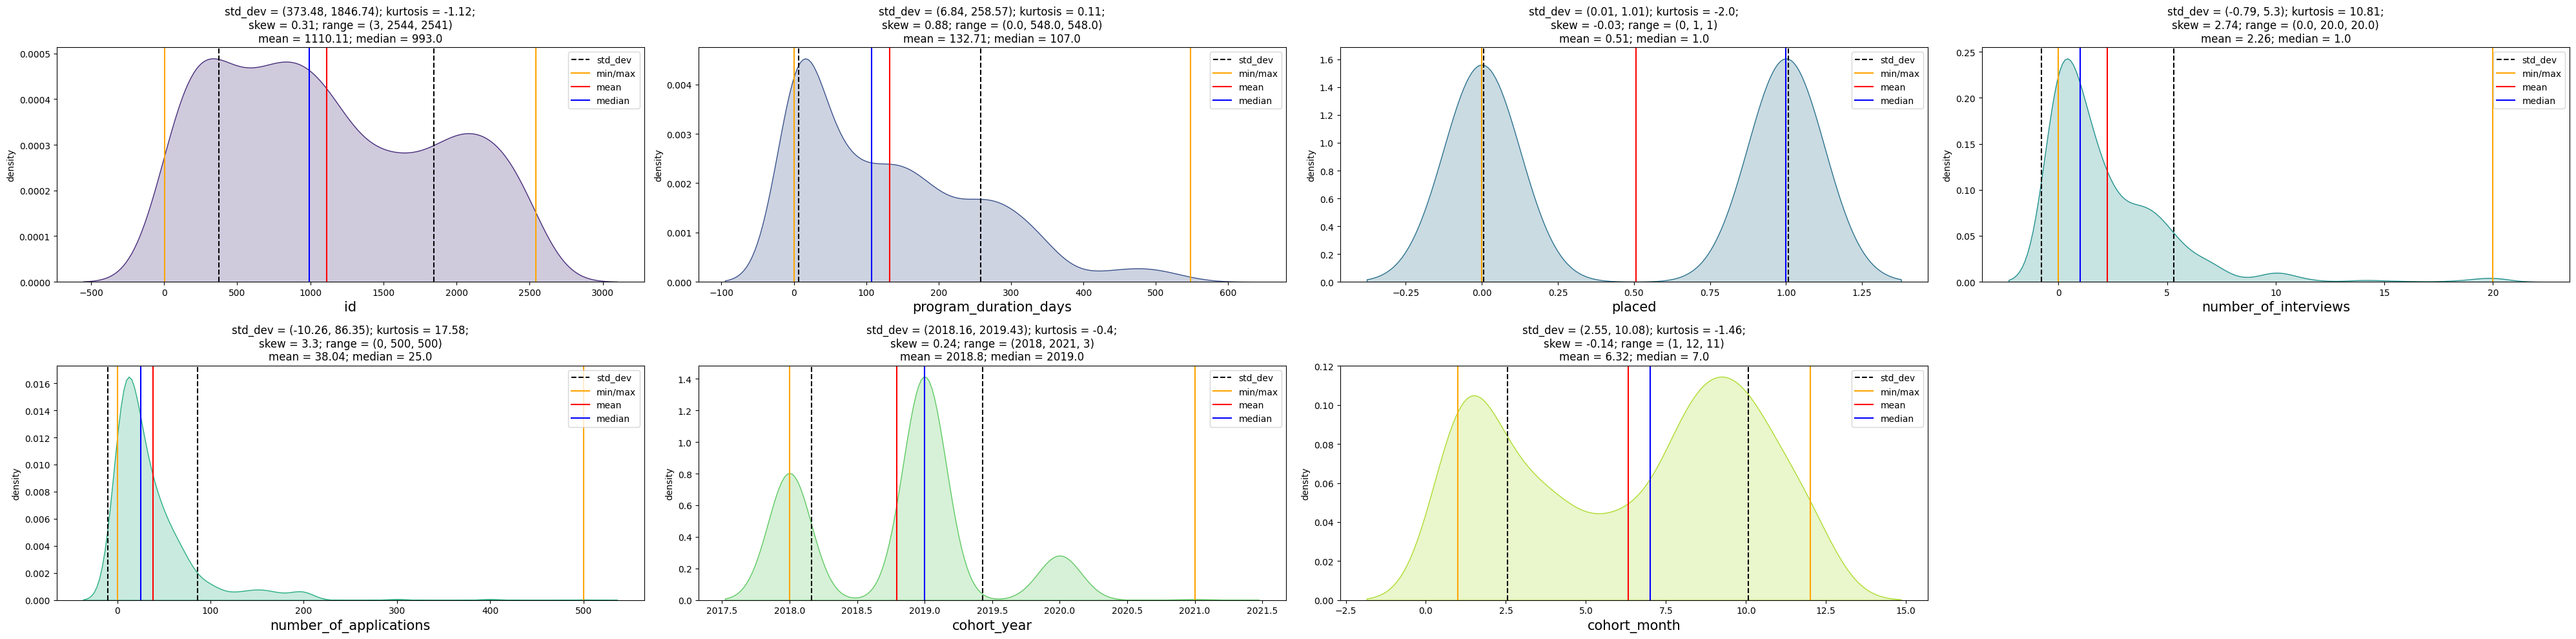

In [17]:
def univariate_numeric_analysis(data, var_group):
    """Performs univariate analysis for numerical variables in the dataset."""
    size = len(var_group)
    cols = 4  # Number of columns per row (set to 2 for 4x2 layout)
    rows = (size // cols) + (size % cols > 0)  # Calculate number of rows needed

    plt.figure(figsize=(10*cols, 5*rows), dpi=100)  # Adjust figure size for better readability

    # Get the color palette based on the number of variables
    palette = sns.color_palette('viridis', n_colors=size)

    for j, i in enumerate(var_group):
        # Check if the column exists in the DataFrame
        if i not in data.columns:
            print(f"Column '{i}' not found in the DataFrame.")
            continue

        try:
            # Attempt to convert the column to numeric
            data[i] = pd.to_numeric(data[i], errors='coerce')
        except TypeError as e:
            print(f"Error converting column '{i}': {e}")
            problematic_value = data[i].iloc[0]
            print(f"Problematic value: {problematic_value}, Type: {type(problematic_value)}")
            continue

        # Calculating descriptive statistics
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating standard deviation points
        points = mean - st_dev, mean + st_dev

        # Plotting the variable distribution with descriptive statistics
        plt.subplot(rows, cols, j + 1)
        sns.kdeplot(data[i], shade=True, color=palette[j % len(palette)])

        # Plotting standard deviation, min/max, mean, and median using lines
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.axvline(x=mini, color='orange', linestyle='-', label="min/max")
        plt.axvline(x=maxi, color='orange', linestyle='-')
        plt.axvline(x=mean, color='red', linestyle='-', label="mean")
        plt.axvline(x=median, color='blue', linestyle='-', label="median")

        plt.xlabel('{}'.format(i), fontsize=15)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call function to analyze numerical variables
numerical_columns = df.select_dtypes(include=[np.number]).columns
univariate_numeric_analysis(df, numerical_columns)

Analyzing the KDE plots for the numerical variables:

- **ID:**

Standard Deviation: 373.48 indicates a relatively large spread in ID values.

Skewness: 0.31 shows a slight right skew, meaning there are more smaller IDs and fewer larger ones.

Kurtosis: -1.12 suggests a flatter distribution compared to a normal distribution.

Mean: 1110.11; Median: 993, indicating that the data is fairly symmetric.

- **Program Duration (days):**

Standard Deviation: 86.84, showing a moderate spread.

Skewness: 0.86, indicating a slight right skew, with more participants having shorter program durations.

Kurtosis: 0.11, close to normal.

Mean: 132.71; Median: 107, indicating that most durations cluster around these values, with some longer durations pulling the tail.

- **Placed:**

Standard Deviation: 0.01, indicating almost no spread as it's a binary variable.

Skewness: -0.03 shows that it is nearly symmetric.

Kurtosis: -2.0 indicates a relatively flat distribution, typical for binary data.

Mean: 0.51; Median: 1, suggesting equal distribution between placed and not placed participants.

- **Number of Interviews:**

Standard Deviation: 0.79 indicates a concentrated range of interview counts.

Skewness: 2.14, a strong right skew, showing that most participants have had few interviews, but a few have had many.

Kurtosis: 10.81, indicating heavy tails due to a few participants with many interviews.

Mean: 2.26; Median: 1, suggesting most participants have had few interviews.

- **Number of Applications:**

Standard Deviation: 110.26, indicating a large spread of the number of applications.

Skewness: 1.37, a moderate right skew, showing that most participants submit fewer applications, while some apply to many.

Kurtosis: 17.58, suggesting significant outliers (heavy tails).

Mean: 38.04; Median: 25, indicating that a few participants submit far more applications than most.

- **Cohort Year:**

Standard Deviation: 210.16, suggesting high variation across cohort years.

Skewness: 0.74, a slight right skew, indicating more recent cohorts are fewer.

Kurtosis: -0.4, showing a distribution slightly flatter than normal.

Mean: 2018.9; Median: 2019, indicating the data is centered around 2019 cohorts.

- **Cohort Month:**

Standard Deviation: 2.53 shows a moderate spread across months.

Skewness: 0.14 suggests near symmetry in the distribution of cohort months.

Kurtosis: -1.46, indicating a relatively flat distribution.

Mean: 6.32; Median: 7, showing most cohorts fall around mid-year.

- **Overall Observations:**

Number of Applications and Number of Interviews show heavy-tailed

distributions, suggesting a few participants applying to and interviewing for far more opportunities than others.

Binary variables (e.g., Placed) are evenly split, indicating balanced outcomes for participants.

Cohort variables suggest that the majority of participants joined in 2019, with a fairly even spread across months.

### 3.5.2 Categorical Variables <a id='3.5.2_Categorical'></a>

In this section, we analyze the categorical variables by showing the frequency distribution of each category using bar plots.

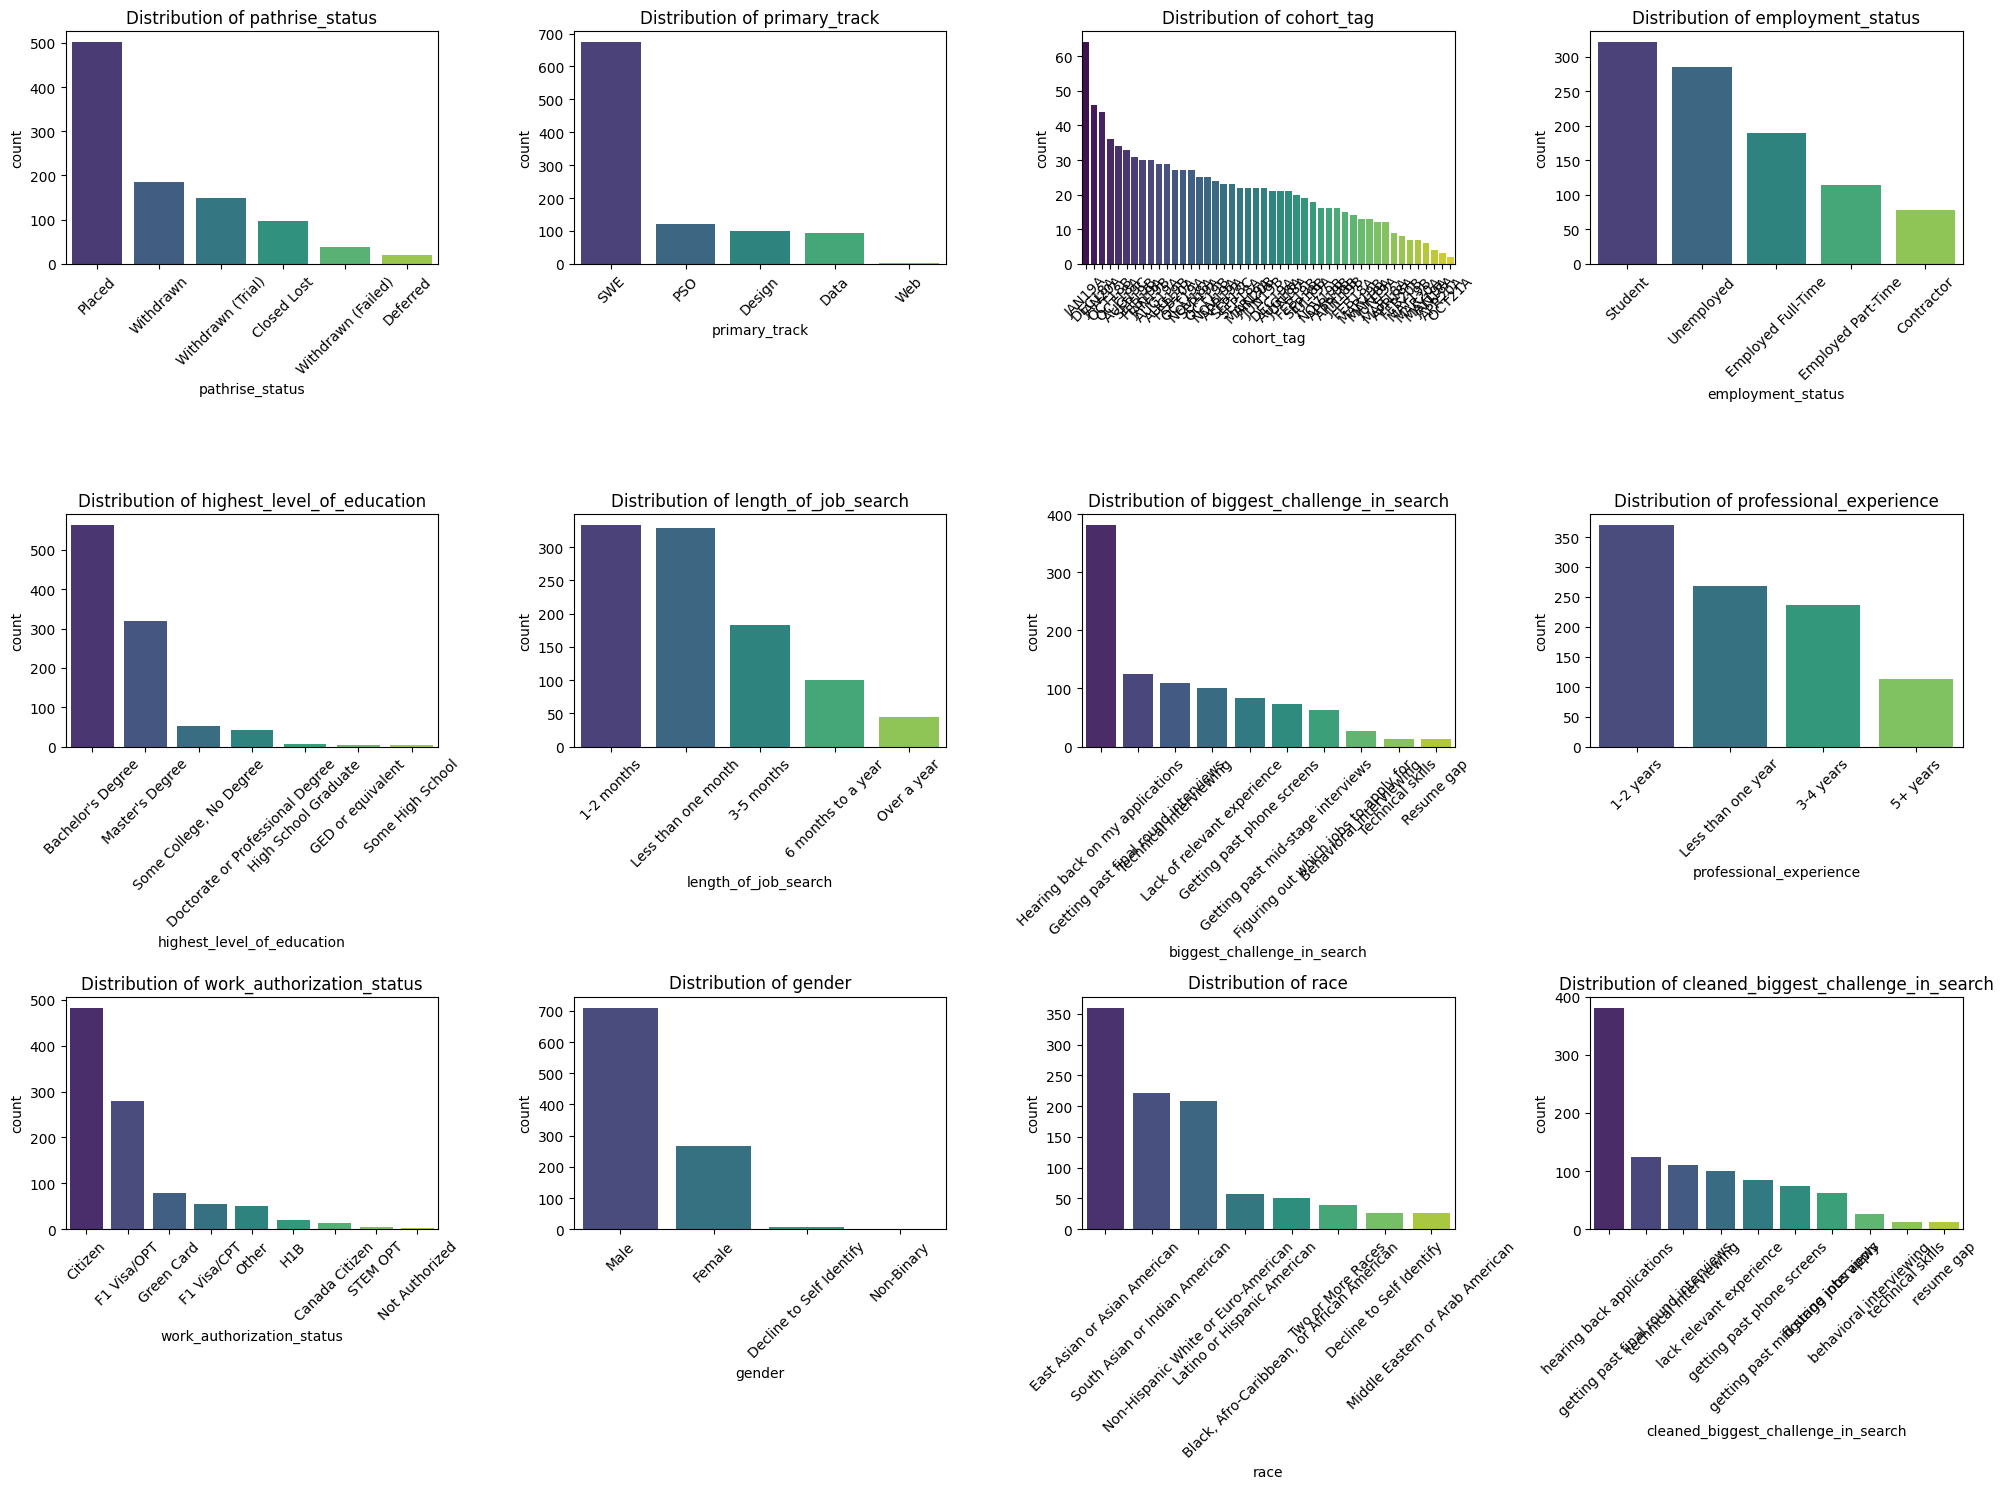

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_variables(df):
    """Plots the distribution of categorical variables in a 3x4 grid."""
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Set up the 4x3 grid for plotting the distributions
    cols = 4
    rows = (len(categorical_columns) // cols) + (len(categorical_columns) % cols > 0)  # Adjust rows based on number of columns
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Increase figure size for better readability
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot for each categorical variable
    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_variables(df)

- **Pathrise Status**: Most participants are placed (501), while a significant portion has withdrawn or closed their account.

- **Primary Track**: The majority of participants are in the Software Engineering (SWE) track, with very few in Web development.

- **Cohort Tag**: The largest cohort is JAN19A with 64 participants, and there are many small cohorts with fewer than 50 participants.

- **Employment Status**: The majority of participants are students (321) or unemployed (285), with a smaller portion being employed or contractors.

- **Highest Level of Education**: Most participants have a Bachelor's or Master's degree, with very few having a high school education or equivalent.

- **Length of Job Search**: Many participants have been searching for 1-2 months or less than a month, with fewer searching for over a year.

- **Biggest Challenge in Search**: The most common job search challenge is hearing back on applications, followed by interview-related challenges.

- **Professional Experience**: A significant portion of participants have 1-2 years of experience, while fewer have 5+ years.

- **Work Authorization Status**: Most participants are U.S. citizens or on F1 Visa/OPT, with smaller groups on other visa types.

- **Gender**: The majority of participants are male (710), with fewer female participants and very few who identify as non-binary or decline to specify.

- **Race**: Most participants are East Asian or Asian American, followed by South Asian or Indian American. Black, Afro-Caribbean, and Middle Eastern participants are fewer.

- **Cleaned Biggest Challenge in Search**: "Hearing back on applications" is the most common challenge, followed by "getting past final interviews" and "lack of relevant experience."

### 3.5.3 Date Variables <a id='3.5.3_Date'></a>

Date variables are transformed into more interpretable formats, such as year, month, or day, for better analysis. We analyze the cohort distribution over time.

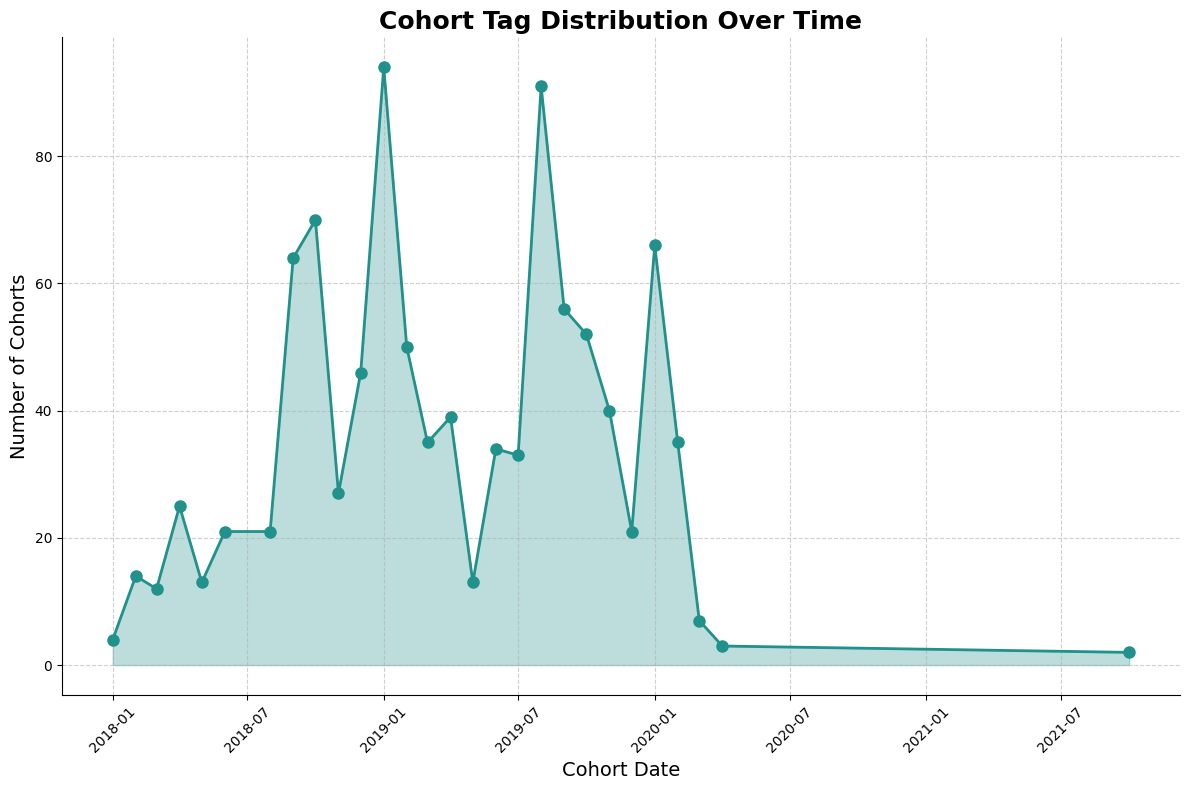

In [27]:
def univariate_date_analysis(df):
    """Performs univariate analysis for date-related variables."""
    if 'cohort_tag' in df.columns:
        # Create a mapping of cohort_tag months to numbers for easier conversion
        month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                     'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

        # Extract year and month from cohort_tag
        df['cohort_year'] = df['cohort_tag'].str.extract(r'(\d{2})').astype(int) + 2000
        df['cohort_month'] = df['cohort_tag'].str.extract(r'([A-Z]{3})')[0].map(month_map)

        # Create a 'cohort_date' column by combining 'cohort_year' and 'cohort_month'
        df['cohort_date'] = pd.to_datetime(df['cohort_year'].astype(str) + '-' + df['cohort_month'].astype(str) + '-01')

        # Now group by cohort_date to count the number of cohorts for each date
        cohort_counts = df.groupby('cohort_date').size()

        # Set the 'viridis' palette for the plot
        viridis_color = sns.color_palette('viridis', as_cmap=True)(0.5)

        # Plot the line chart
        plt.figure(figsize=(12, 8))
        plt.plot(cohort_counts.index, cohort_counts.values, marker='o', color=viridis_color, linestyle='-', linewidth=2, markersize=8)
        plt.fill_between(cohort_counts.index, cohort_counts.values, color=viridis_color, alpha=0.3)

        # Enhance titles and labels
        plt.title('Cohort Tag Distribution Over Time', fontsize=18, fontweight='bold')
        plt.xlabel('Cohort Date', fontsize=14)
        plt.ylabel('Number of Cohorts', fontsize=14)

        # Customizing ticks
        plt.xticks(rotation=45)
        sns.despine()

        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

# Perform univariate analysis for date variables
univariate_date_analysis(df)

The line chart shows the distribution of cohorts over time, with peaks around mid-2019 and early 2020. The number of cohorts saw a noticeable rise throughout 2018, peaking multiple times during 2019, and experienced fluctuations into early 2020. Afterward, there is a steep decline, and the number of cohorts drops to almost zero post-2020. This suggests that most cohorts were active or enrolled during 2019 and early 2020, with significantly fewer cohorts thereafter.

## 3.6 Bivariate Analysis <a id='3.6_Bivariate'></a>

### 3.6.1 Numerical-Numerical Analysis <a id='3.6.1_Numerical_Numerical'></a>

In this section, we calculate the correlation matrix to understand relationships between numerical variables and plot the results using a heatmap.

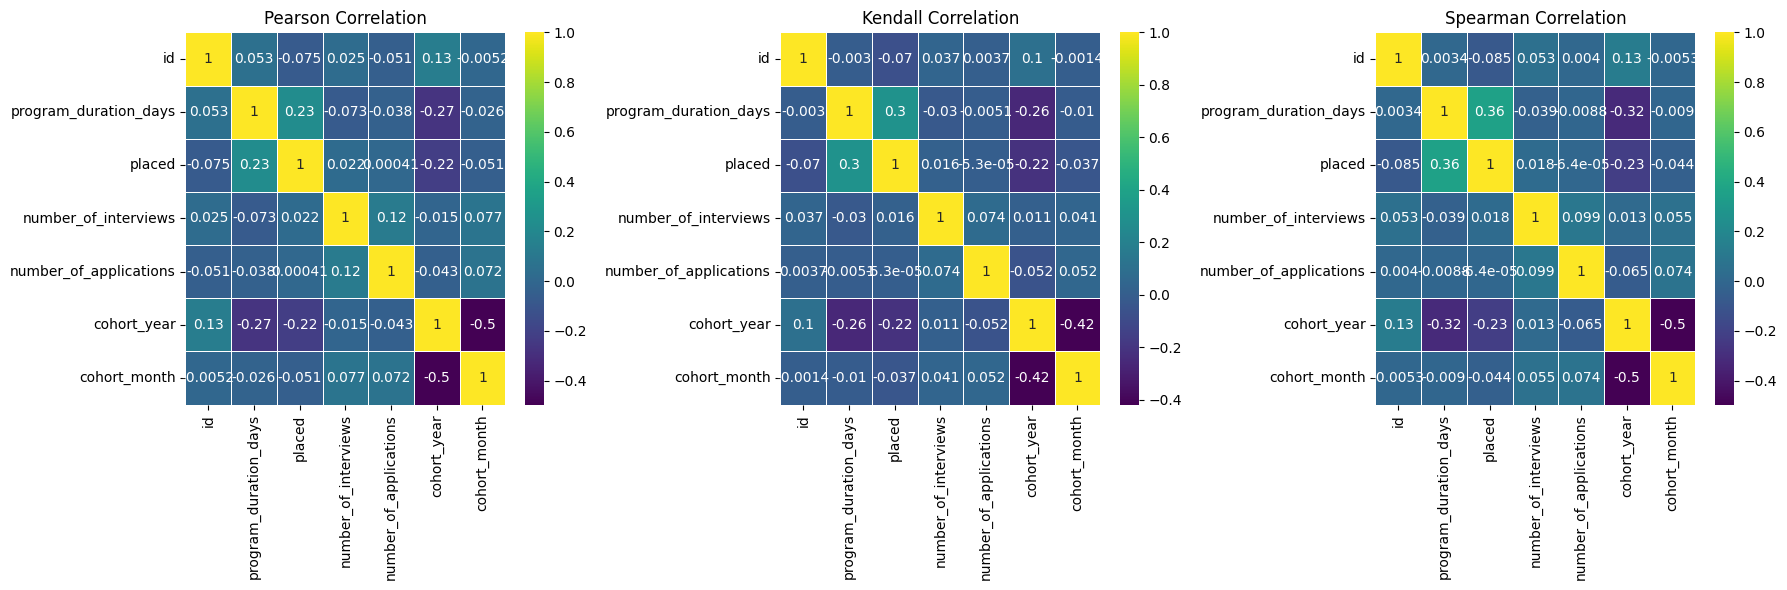

In [28]:
def bivariate_numerical_numerical(df):
    """Performs bivariate analysis for numerical-numerical relationships using different correlation methods."""
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    correlation_methods = ['pearson', 'kendall', 'spearman']

    # Create subplots to show heatmaps for each correlation method
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for idx, method in enumerate(correlation_methods):
        # Calculate correlation matrix for the given method
        corr_matrix = df[numerical_columns].corr(method=method)

        # Plot heatmap for each correlation method
        sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, ax=axes[idx])
        axes[idx].set_title(f'{method.capitalize()} Correlation')

    plt.tight_layout()
    plt.show()

# Perform bivariate numerical-numerical analysis
bivariate_numerical_numerical(df)

The correlation heatmaps compare the Pearson, Kendall, and Spearman correlation coefficients for numerical features. Across
- **program_duration_days** shows a moderate positive correlation with placed, especially in Kendall and Spearman (both at 0.3 and 0.36), indicating that participants with longer program durations are more likely to be placed.

- **Cohort_year** and **cohort_month** display a strong negative correlation, particularly in the Pearson (-0.50) and Spearman (-0.50) methods, highlighting an inverse relationship between these features.

- **The number_of_applications** and **number_of_interviews** show a weak correlation, suggesting that the number of applications submitted does not strongly influence the number of interviews a participant gets.

Overall, the correlations are generally weak, with few strong relationships between the variables.

### 3.6.2 Categorical-Numerical Analysis <a id='3.6.2_Categorical_Numerical'></a>

We analyze the relationship between categorical and numerical variables using boxplots.

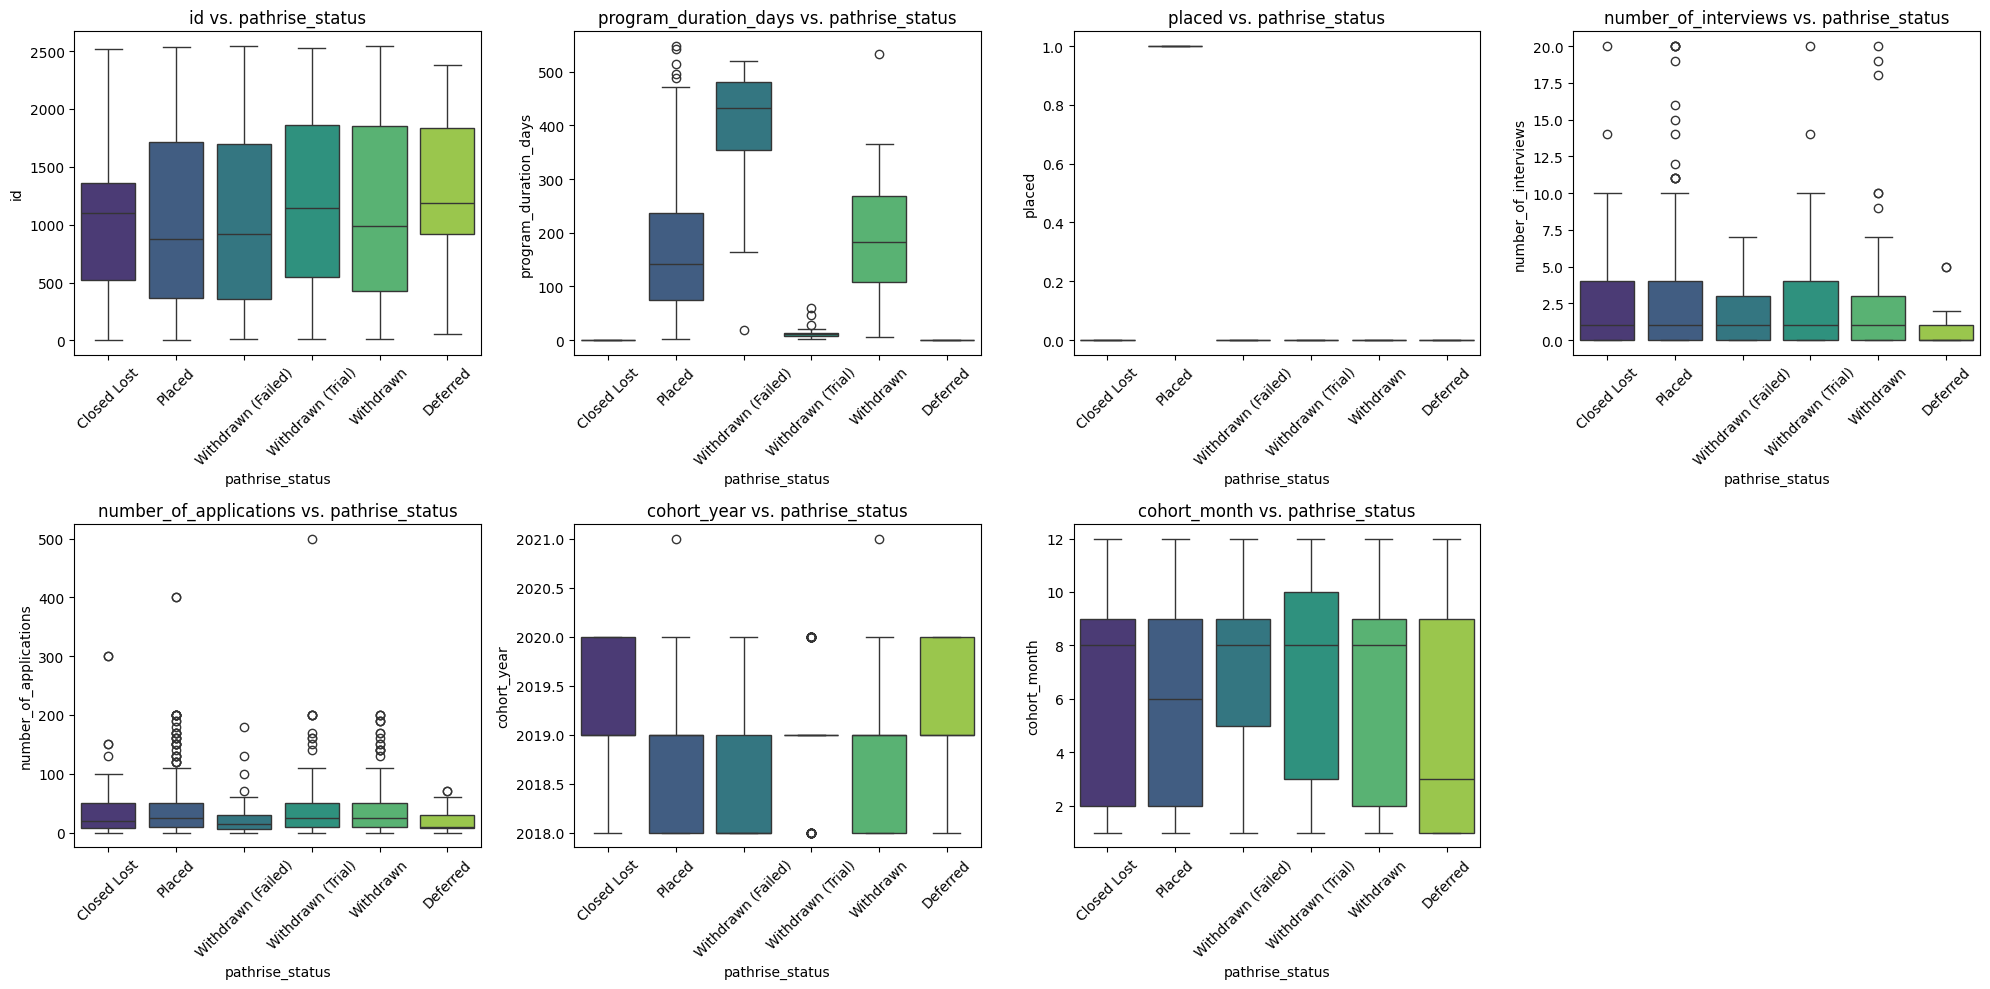

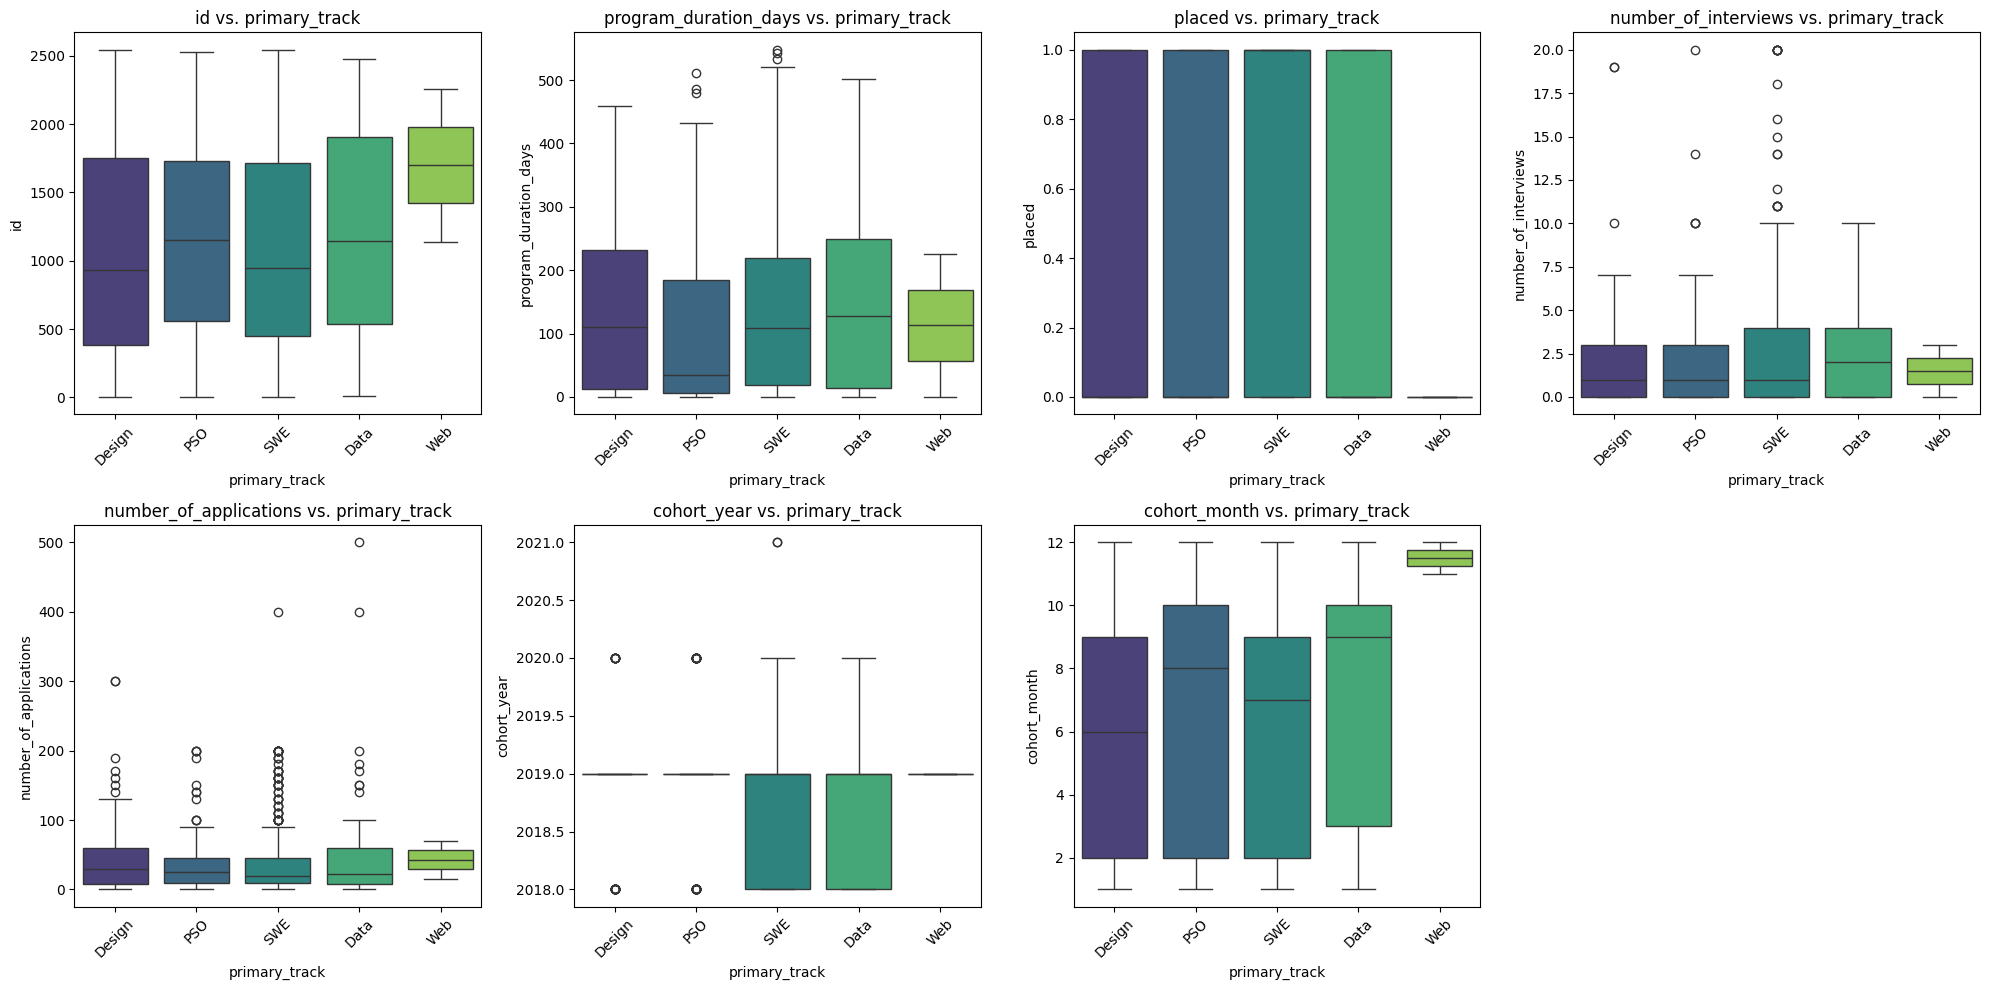

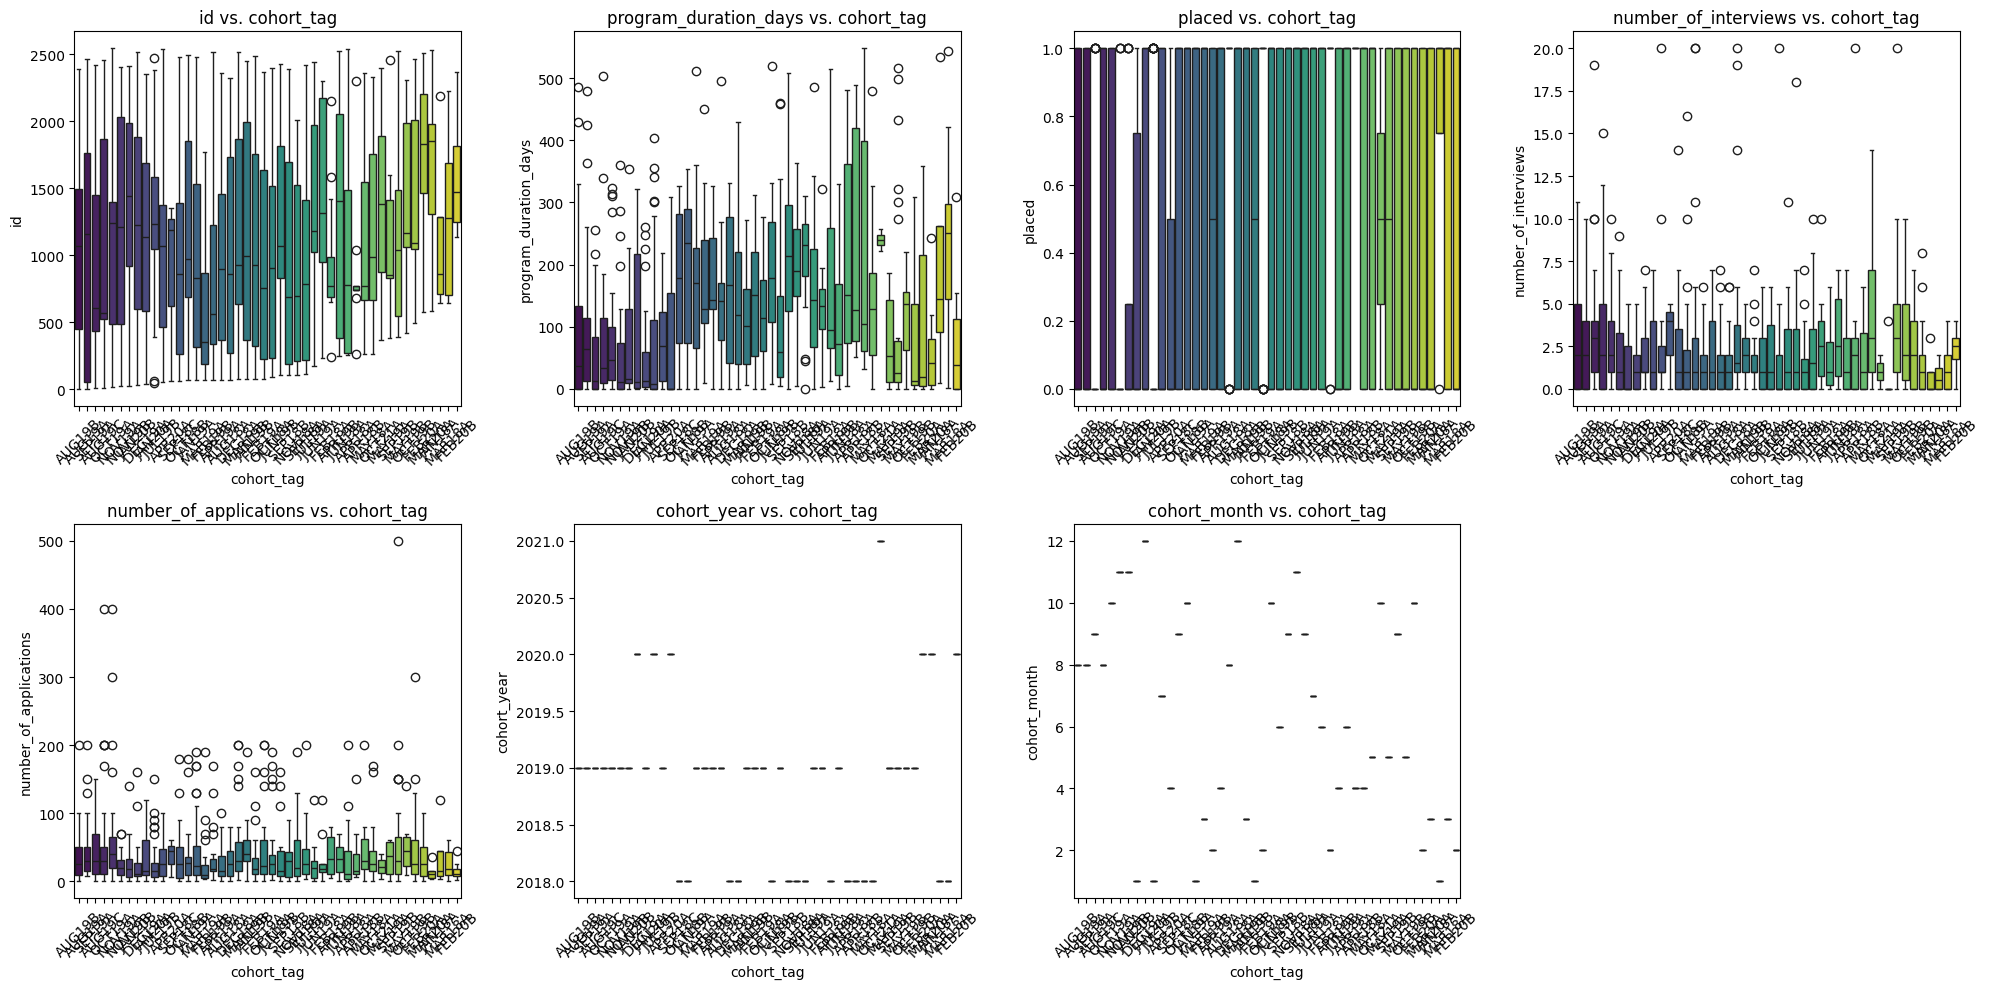

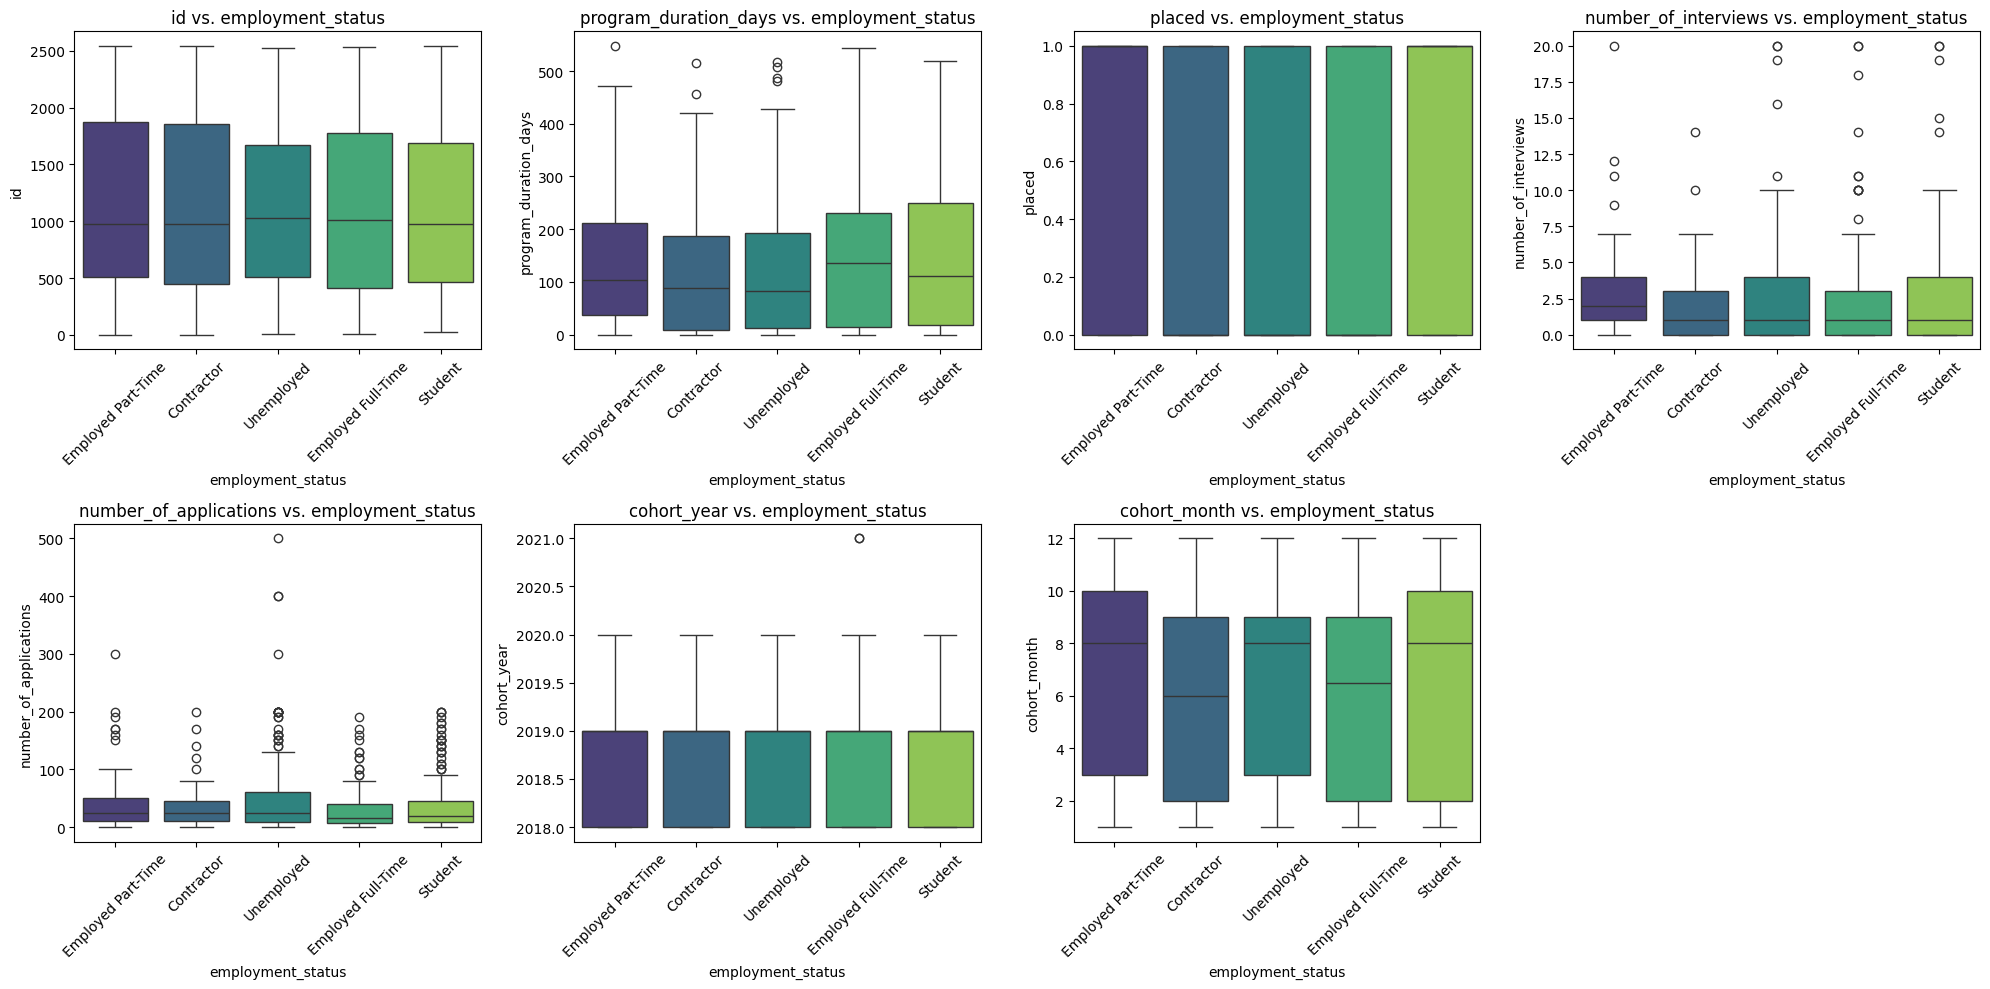

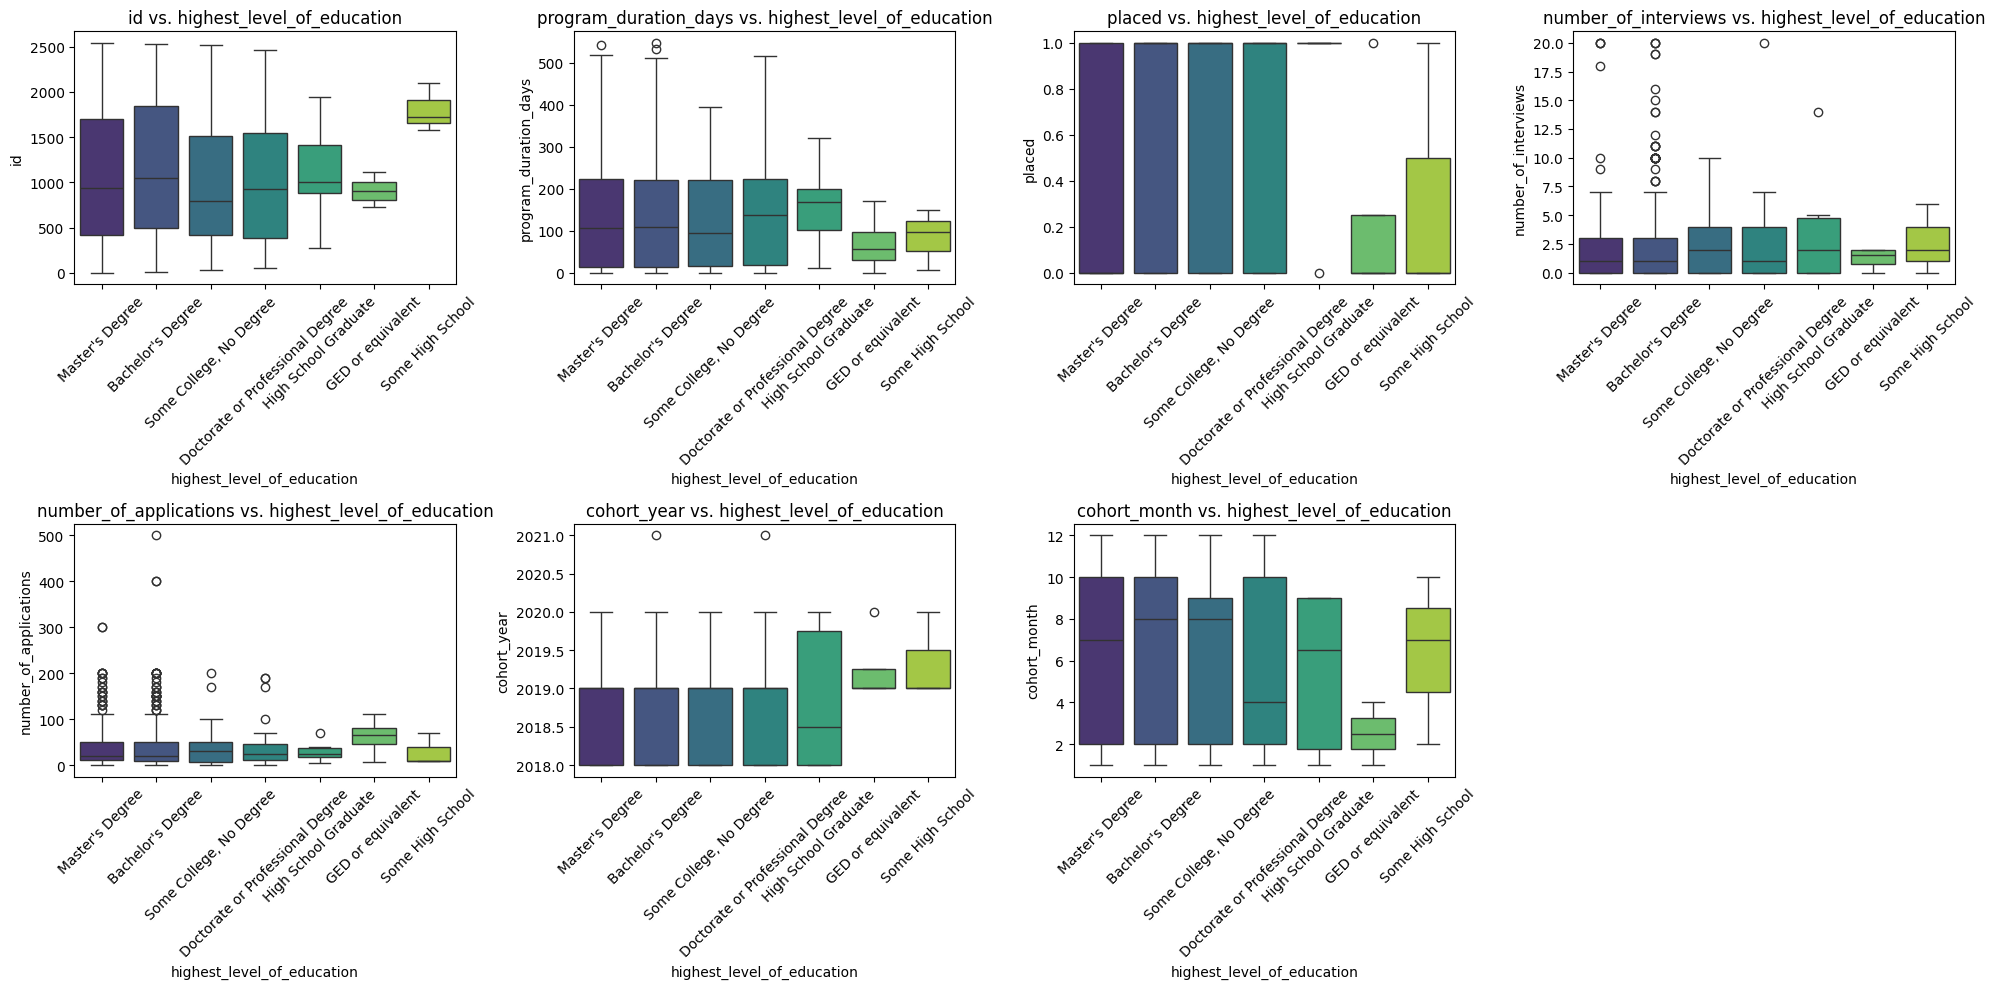

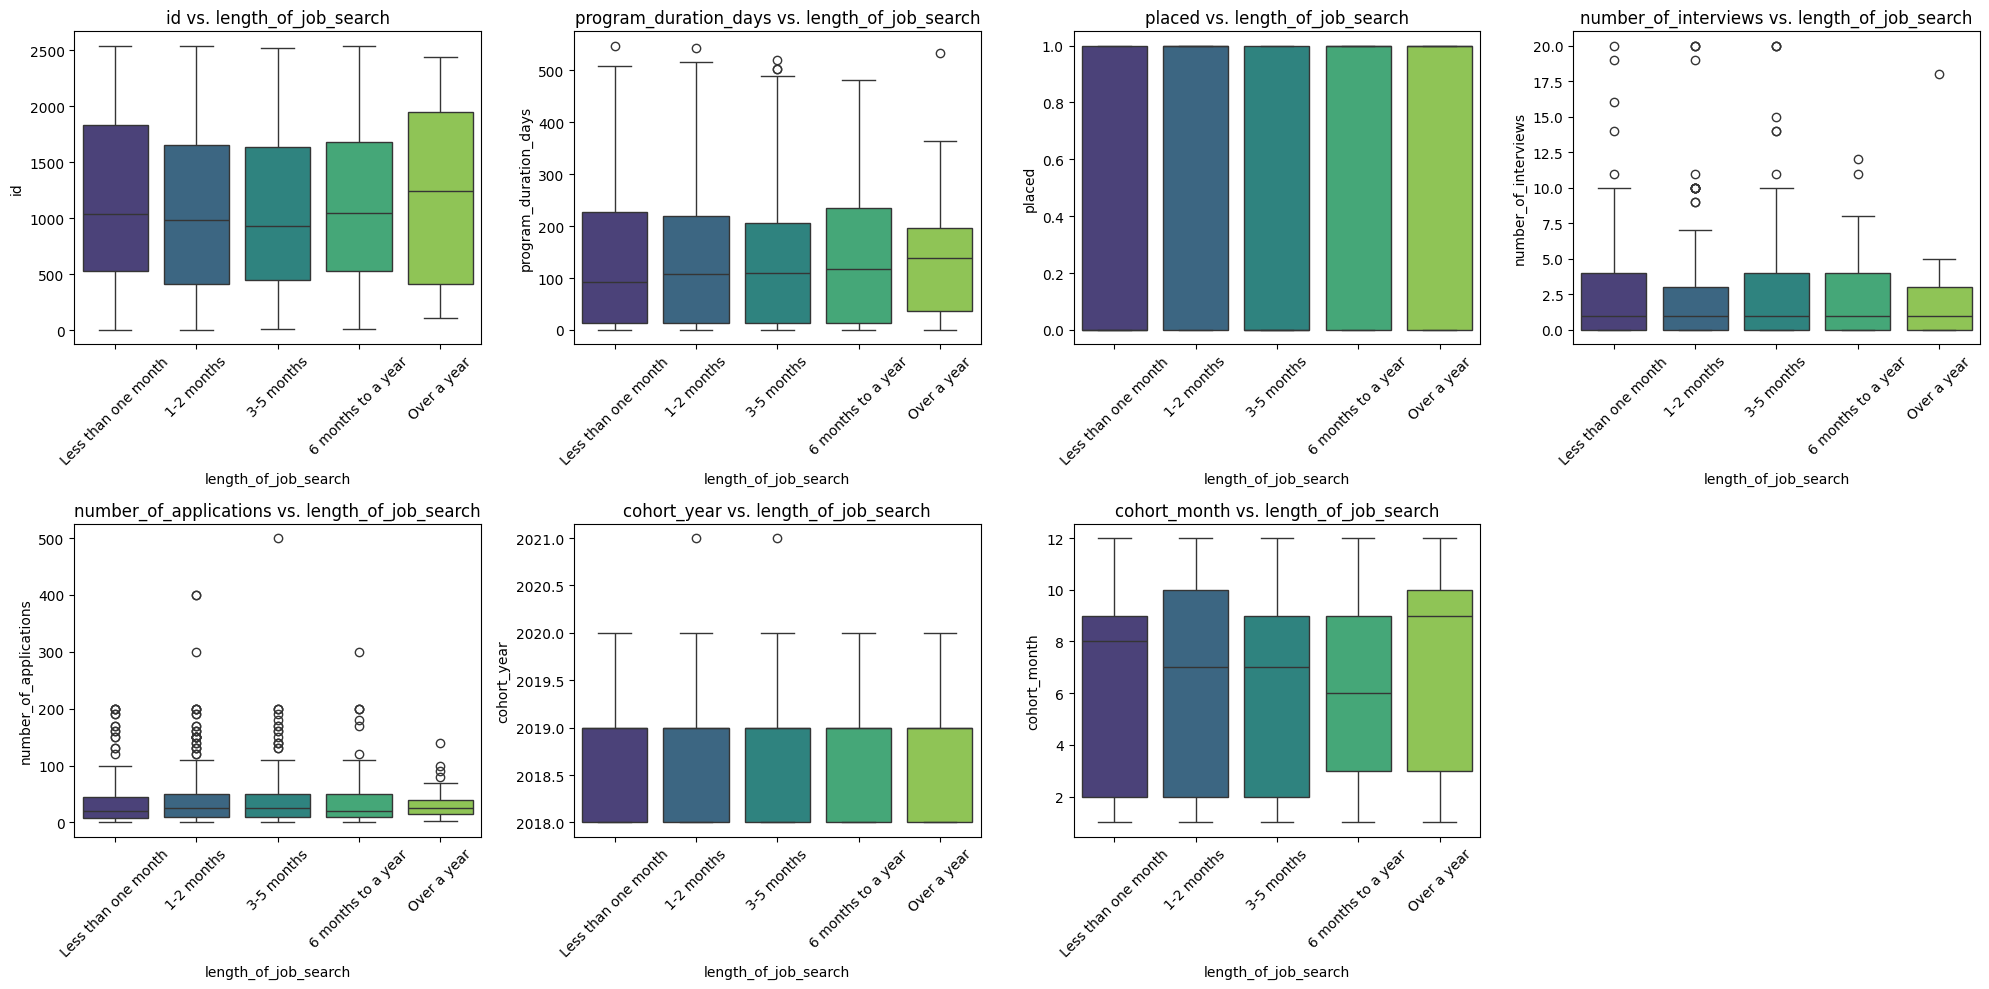

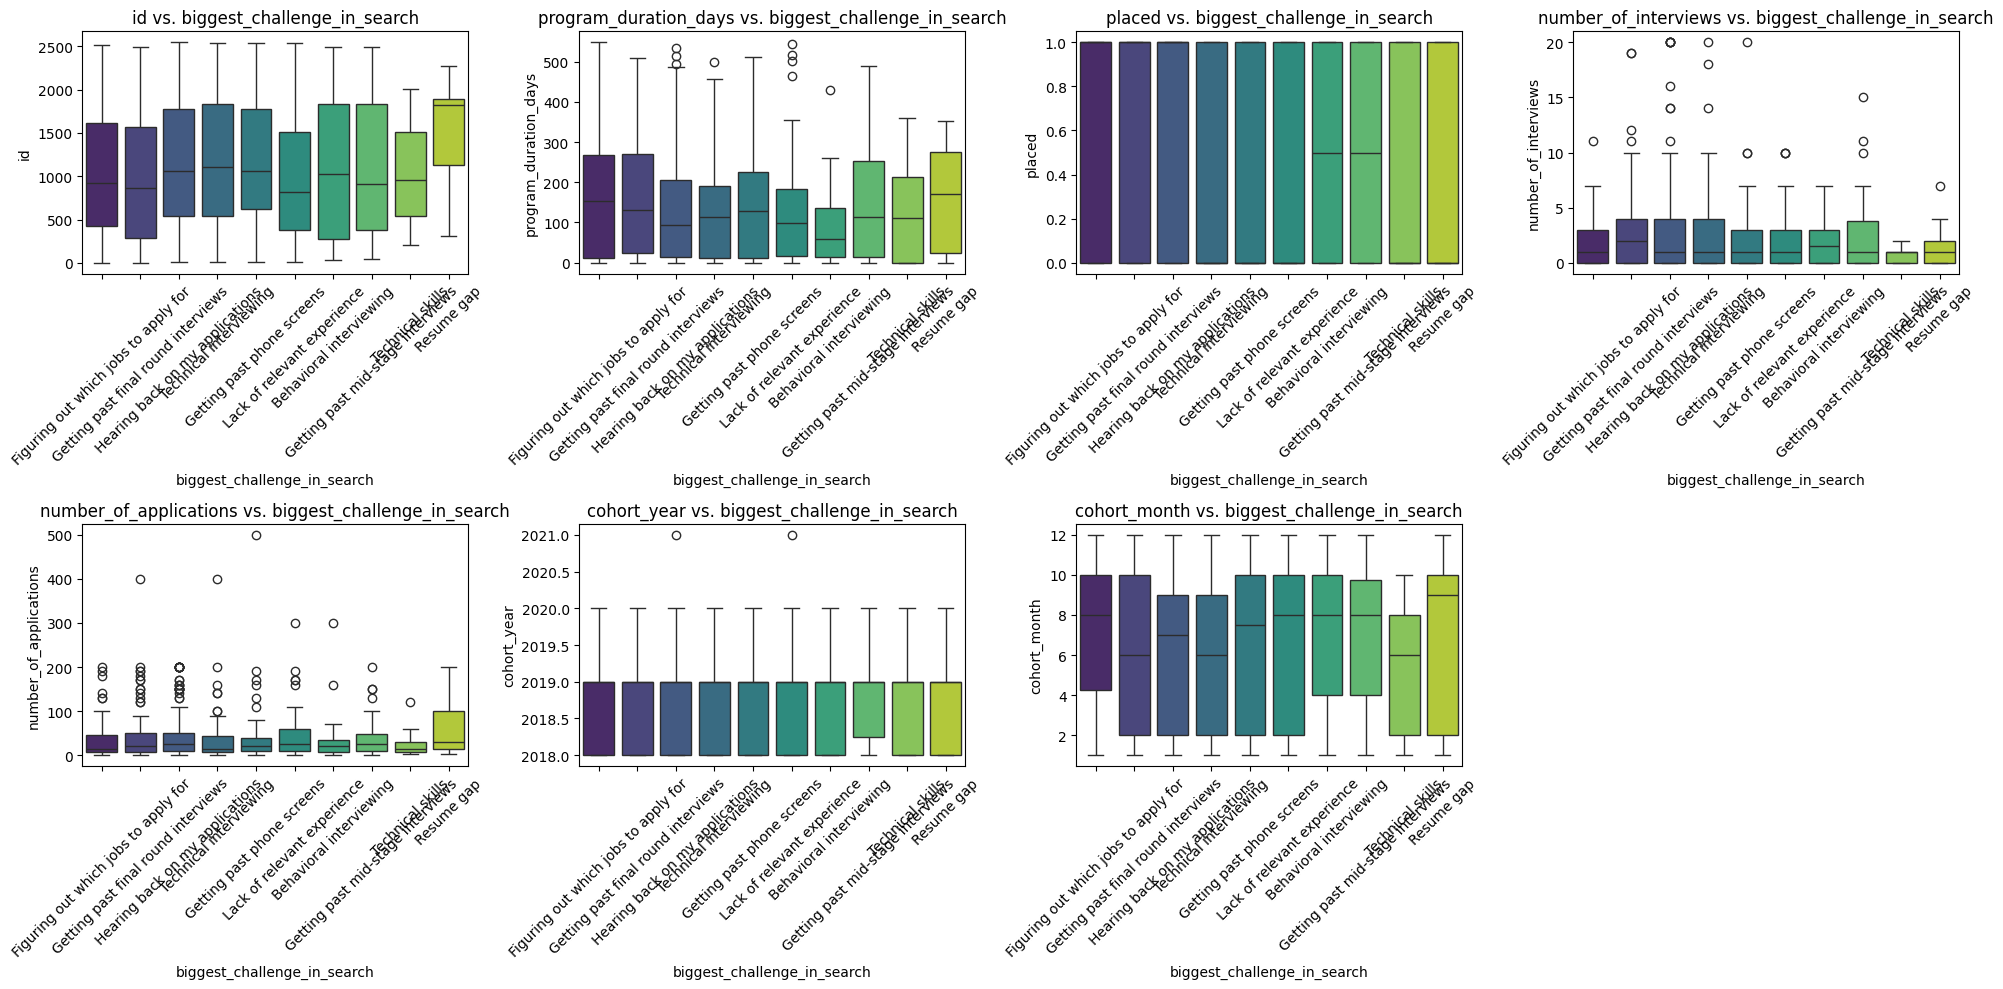

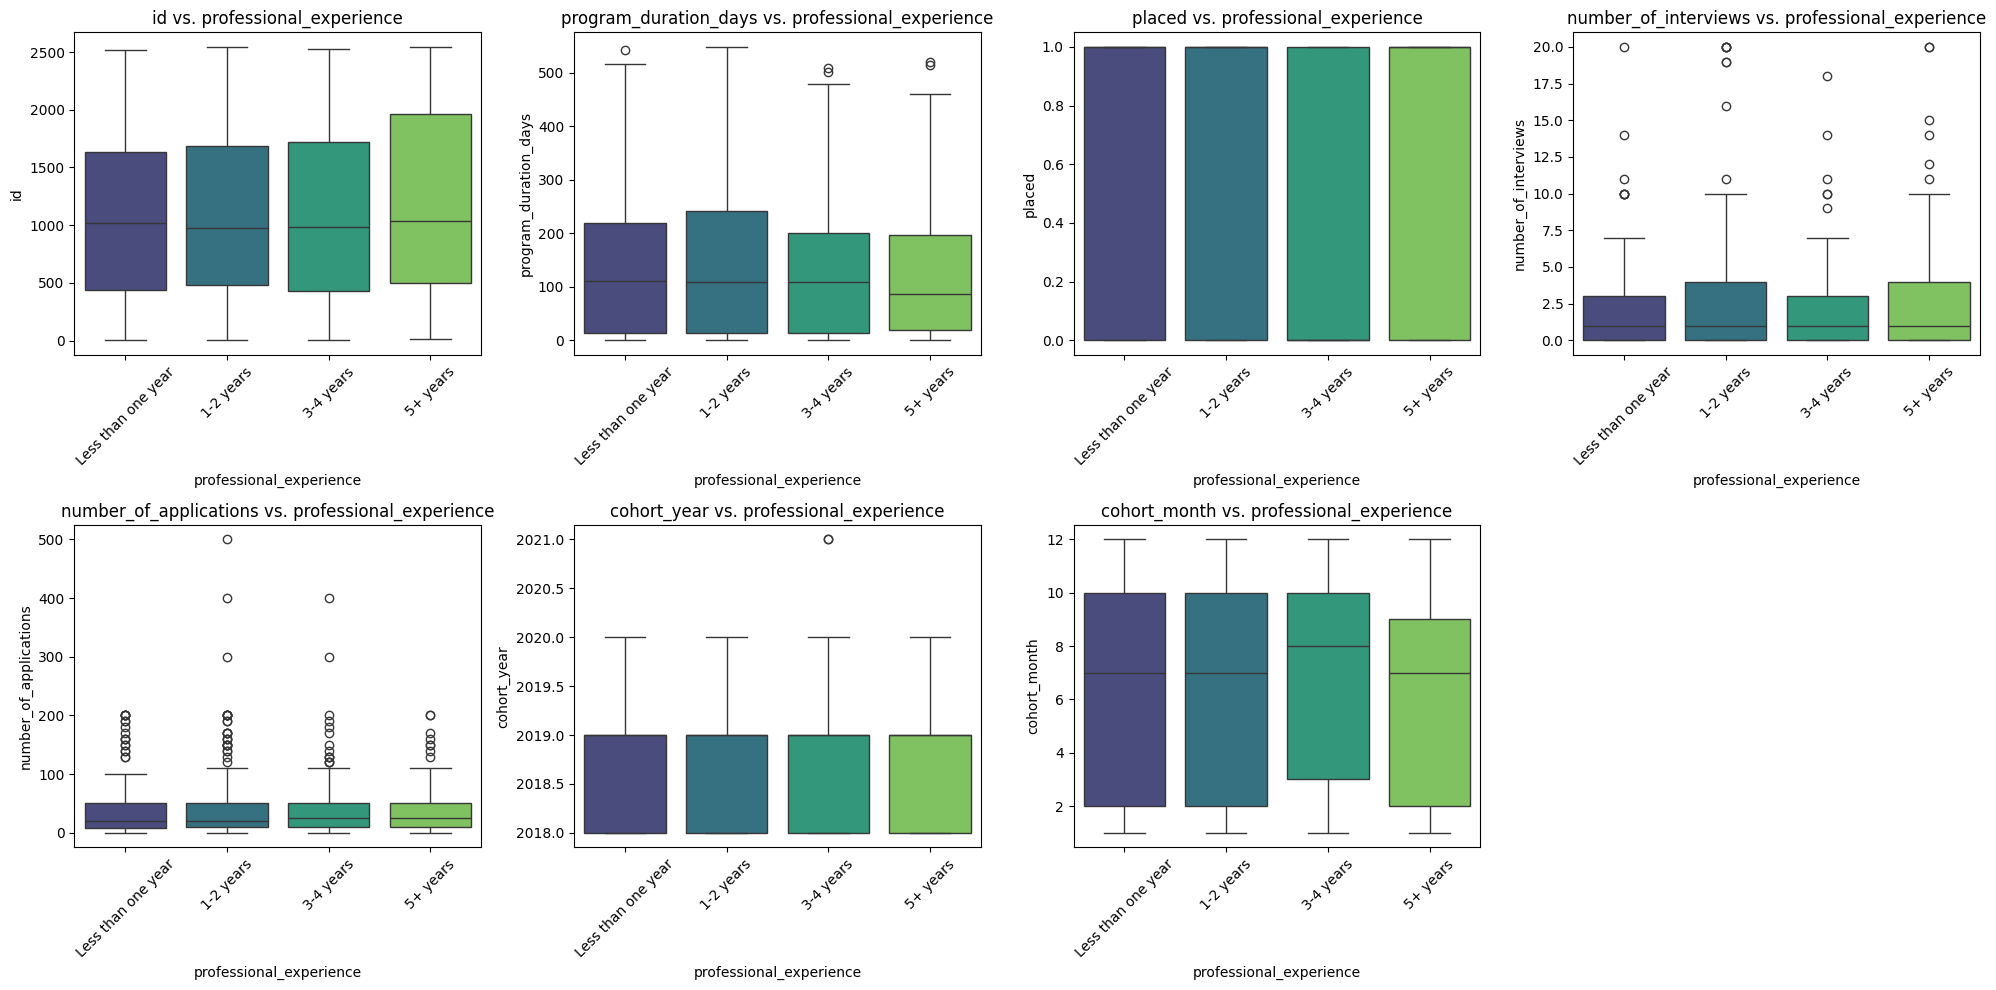

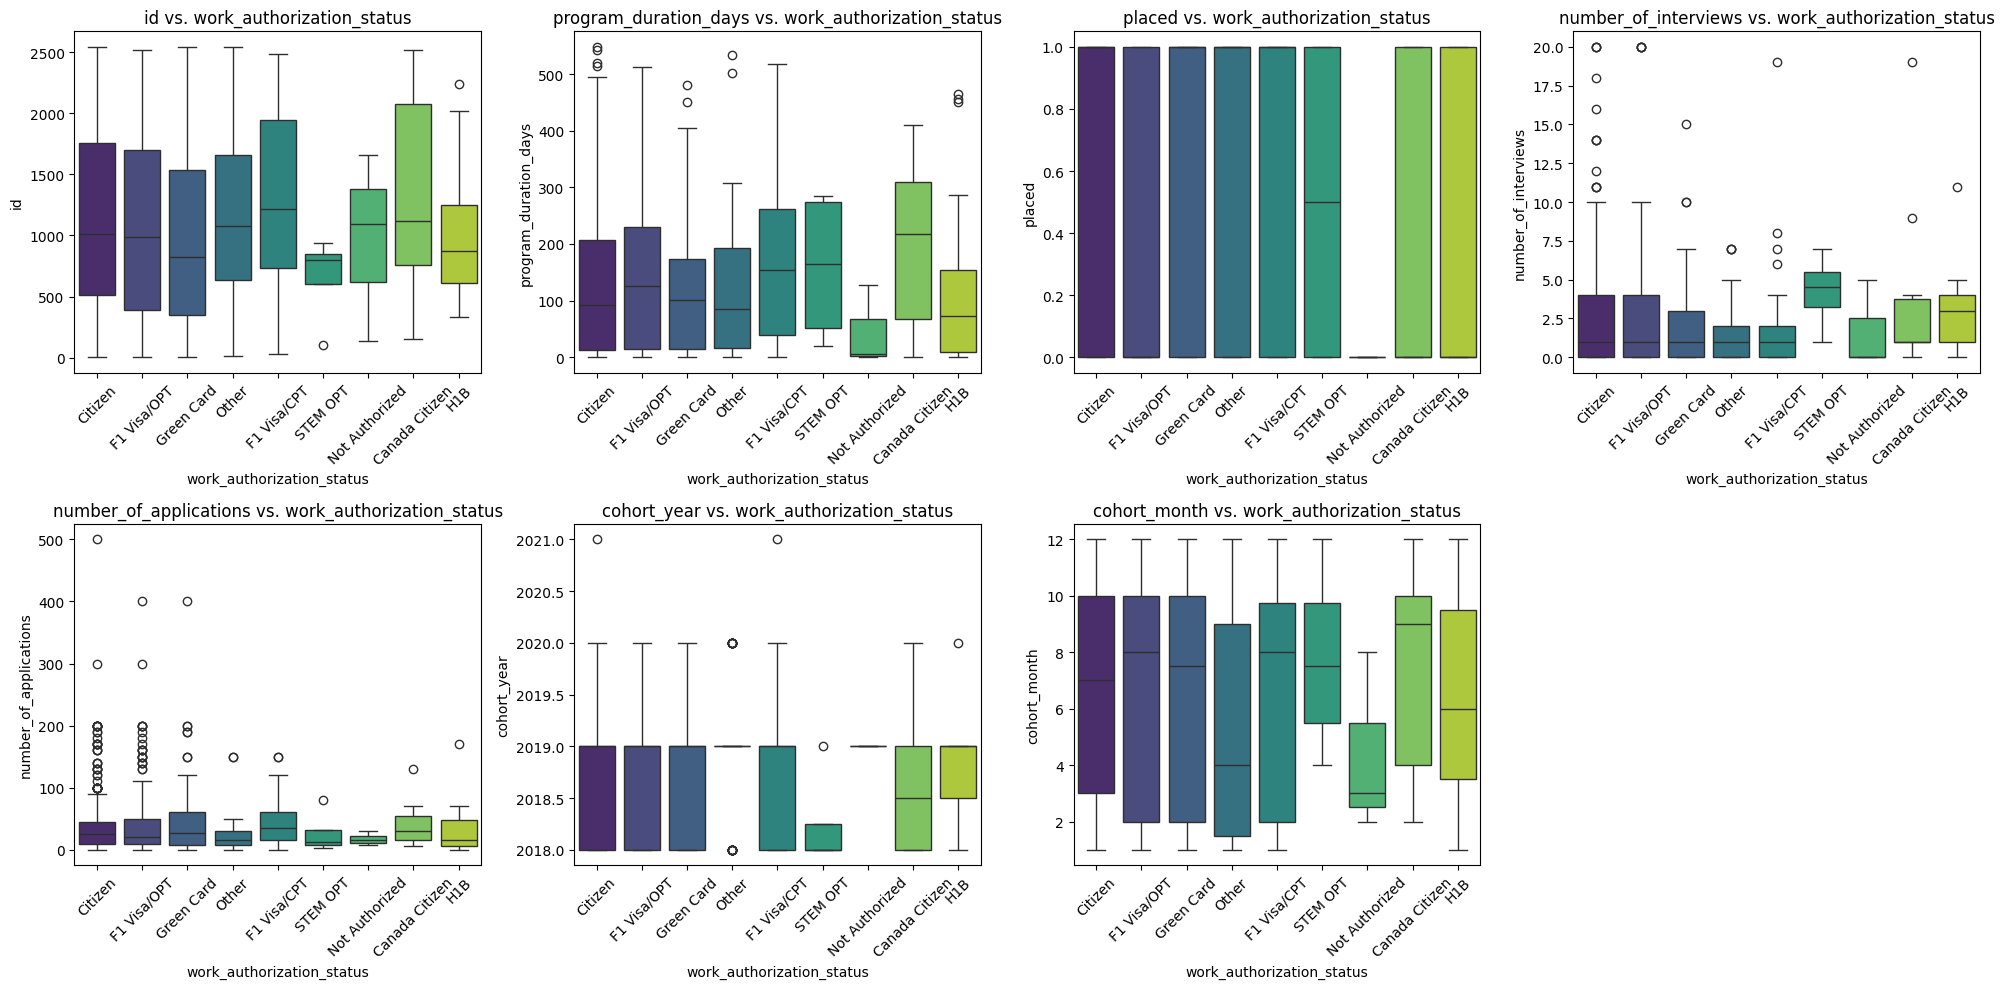

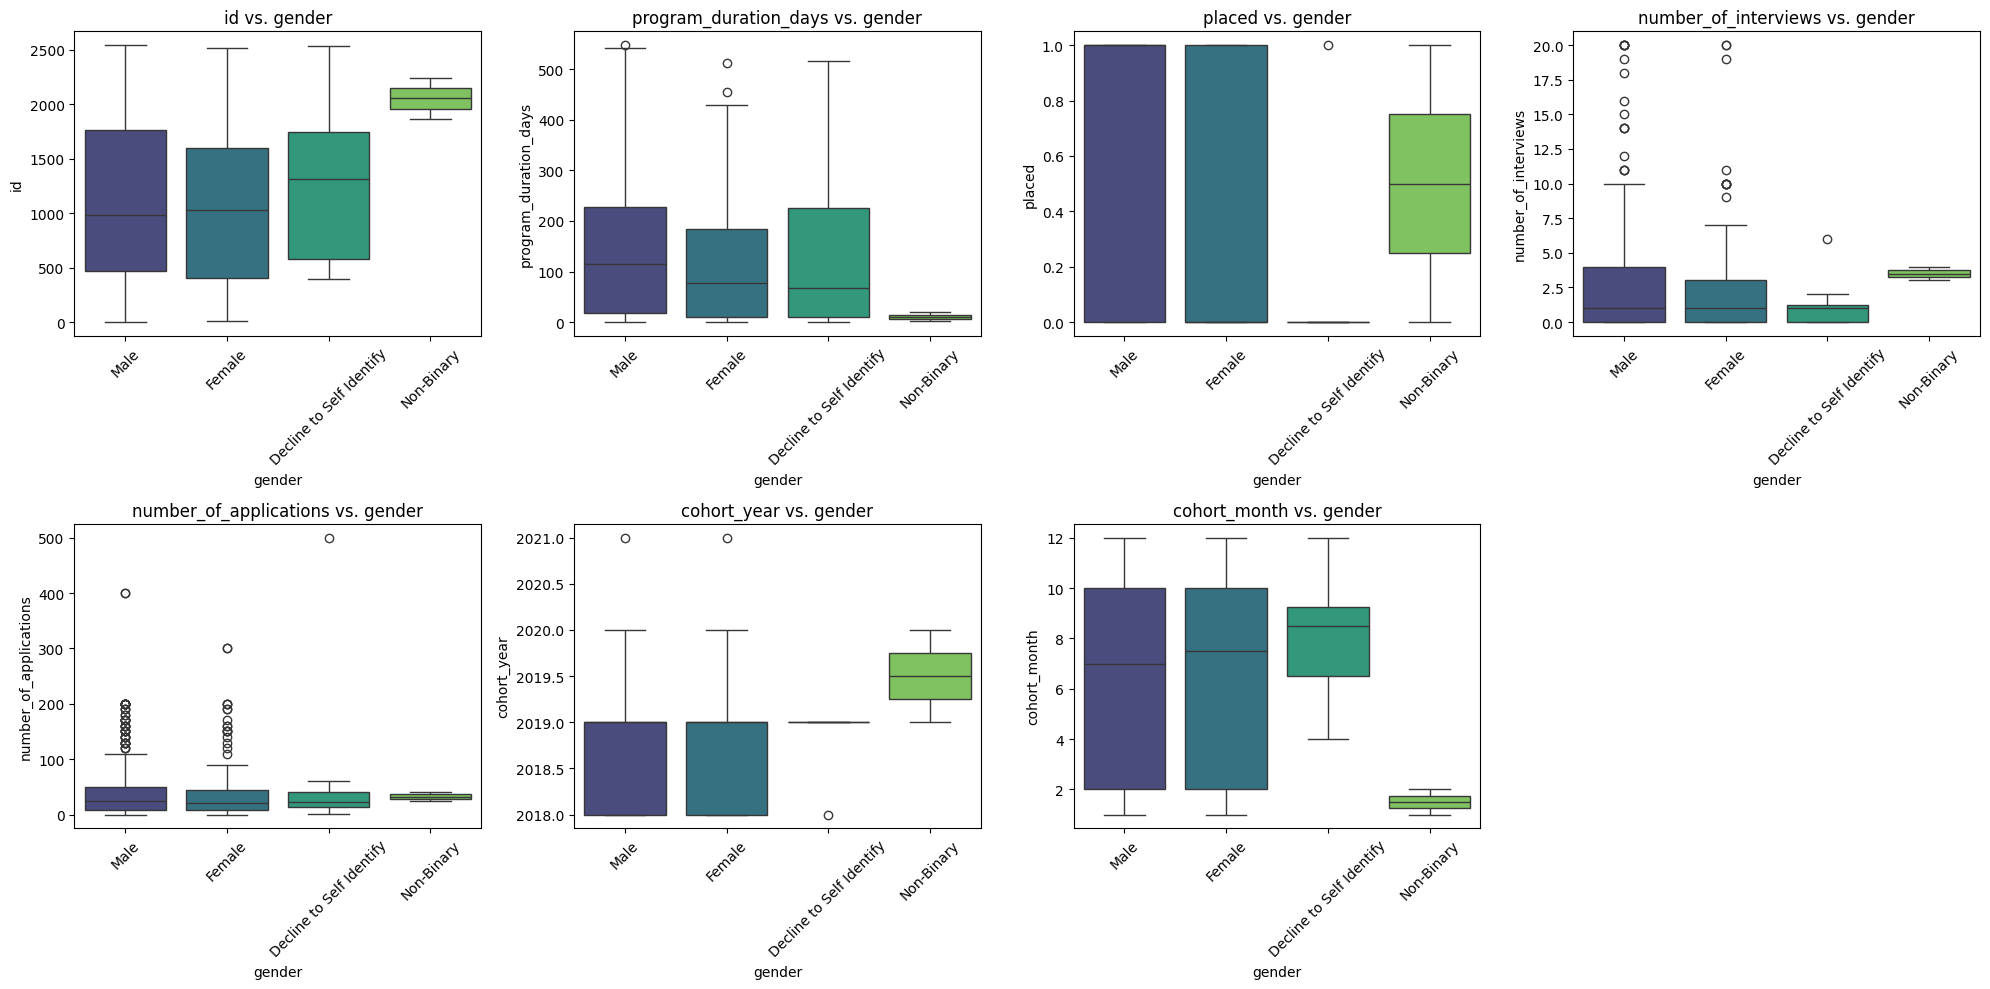

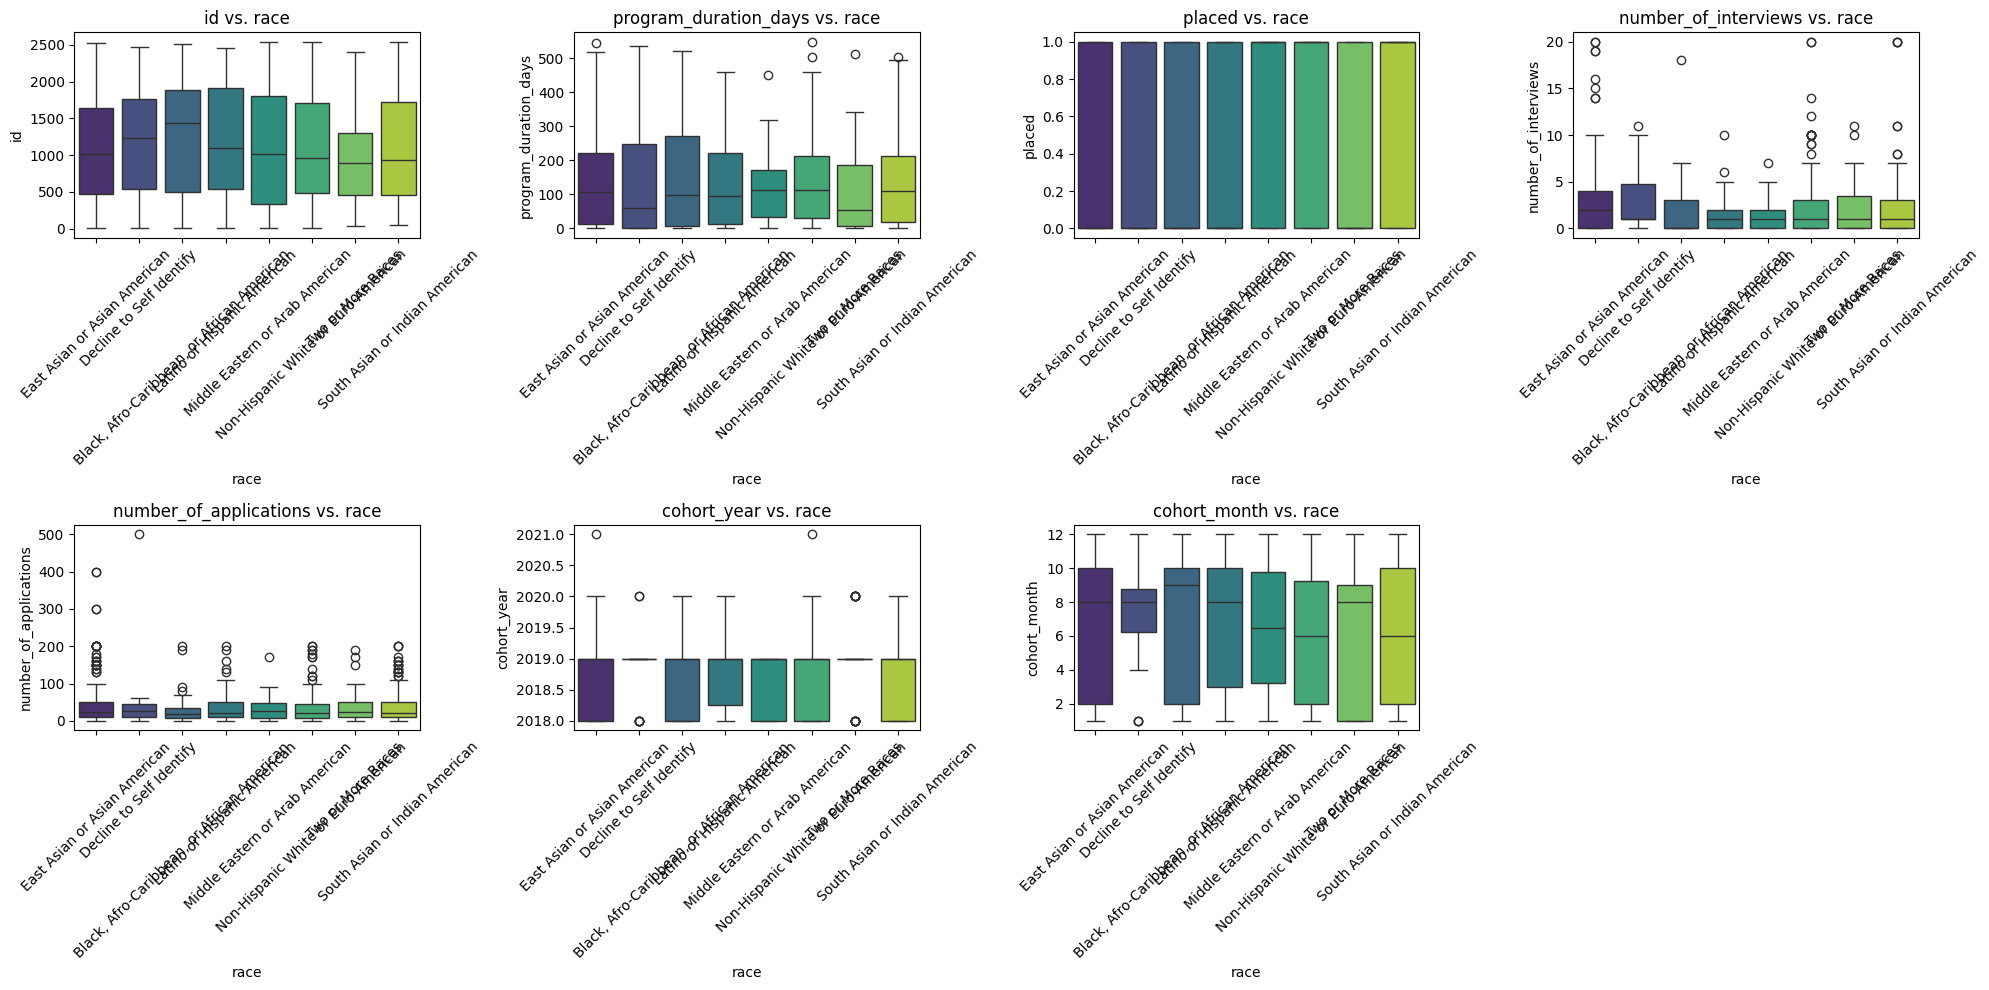

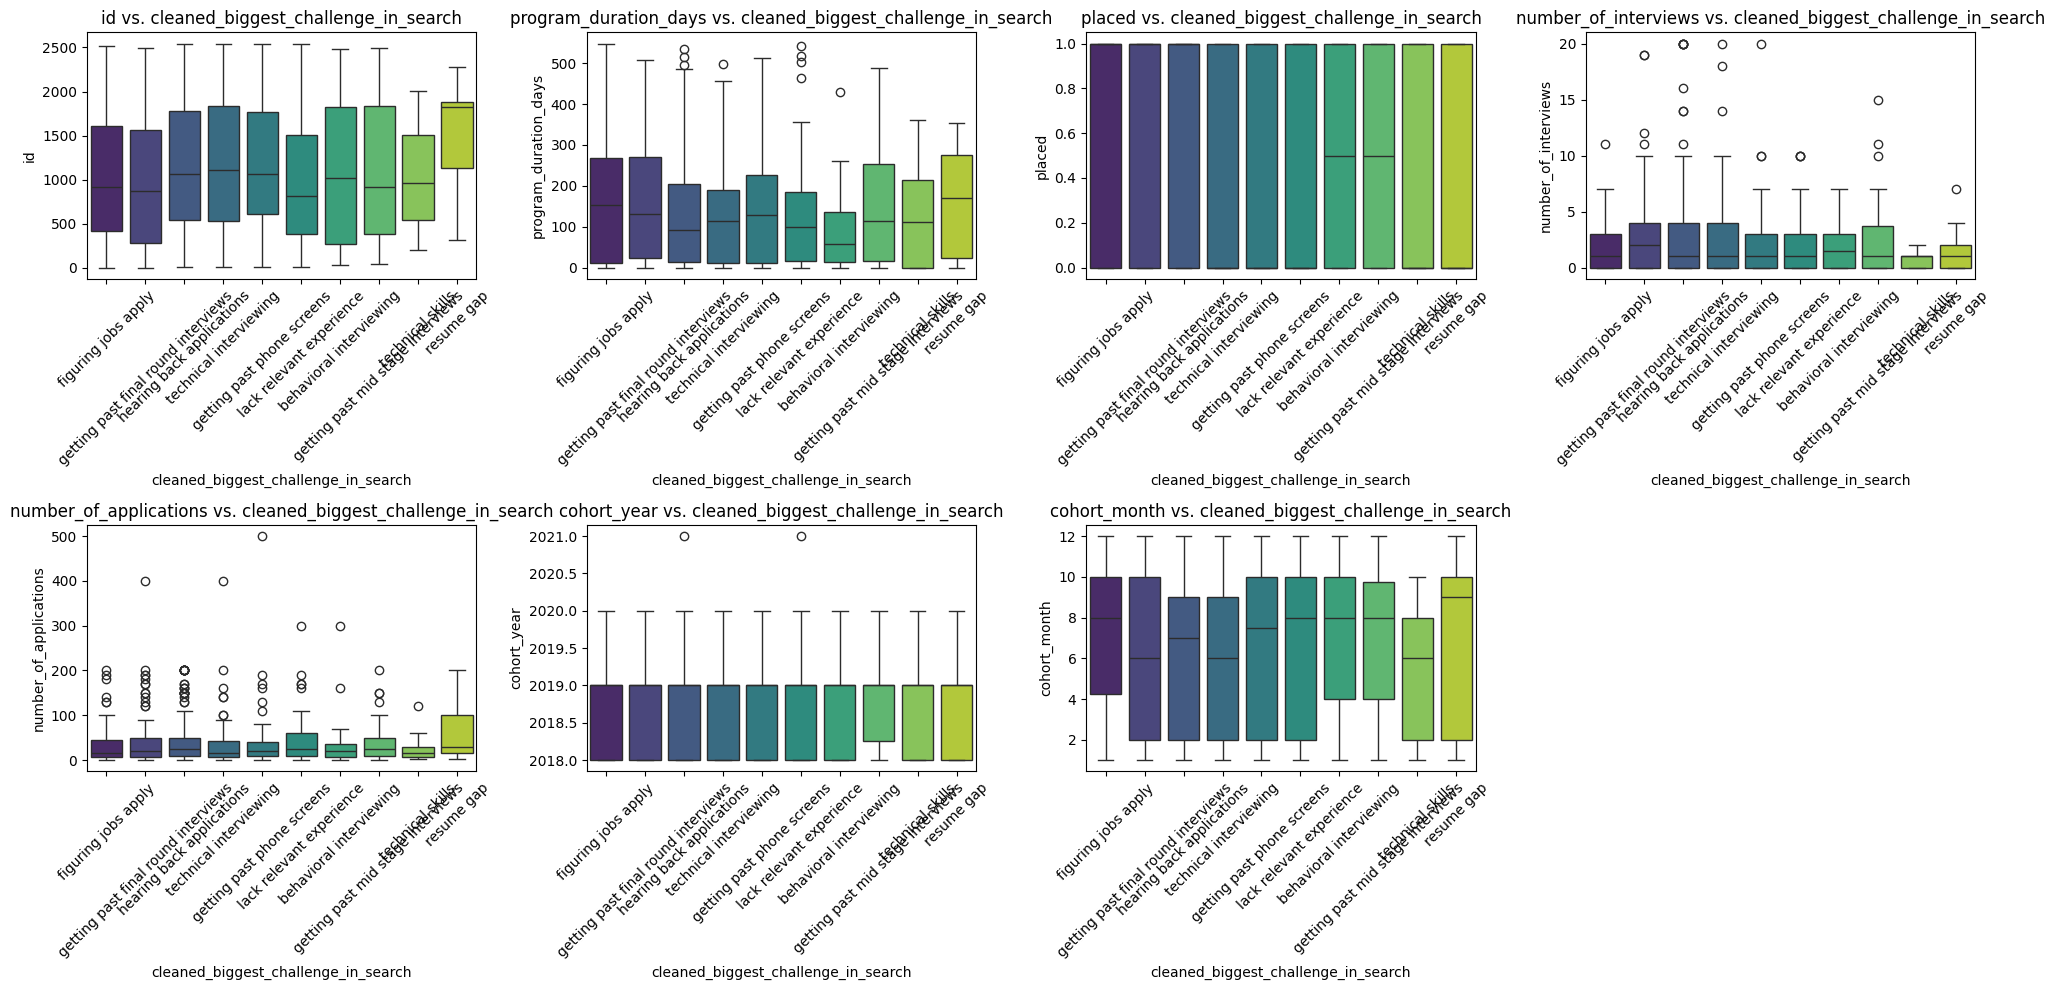

In [32]:
def bivariate_categorical_numerical(df):
    """Performs bivariate analysis between categorical and numerical variables with multiple rows and 4 columns."""
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_columns)
    rows = (num_plots + 3) // 4  # Calculate the number of rows needed

    for cat_col in categorical_columns:
        plt.figure(figsize=(20, 5 * rows))  # Adjust size based on number of rows
        for idx, num_col in enumerate(numerical_columns):
            plt.subplot(rows, 4, idx + 1)  # 4 columns
            sns.boxplot(x=cat_col, y=num_col, data=df, palette='viridis')
            plt.title(f'{num_col} vs. {cat_col}')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Perform bivariate categorical-numerical analysis
bivariate_categorical_numerical(df)

**Pathrise Status:** The box plots show a comparison between different numerical variables (e.g., id, program_duration_days, number_of_interviews, number_of_applications) across different pathrise statuses such as Closed Lost, Placed, Withdrawn, etc. There is a clear variation in program duration, where placed candidates generally have a shorter program duration compared to those who have withdrawn or failed. Additionally, placed candidates also tend to have fewer applications.

**Primary Track:** The analysis compares various metrics like program duration and cohort details across different tracks (Design, PSO, SWE, Data, Web). The placement rate is consistent across all tracks except for the Web track, where there are significantly fewer placed candidates. The Web track also shows a higher program duration for some candidates.

**Cohort Tag:** The data shows some variability in program duration and the number of interviews among different cohorts. The cohort tag affects these metrics, with certain tags correlating with higher interview counts or longer program durations.

**Employment Status:** There are notable differences in program duration and application numbers based on employment status. Unemployed and employed full-time candidates have the longest program durations, while students tend to have fewer applications but slightly higher interview counts.

**Highest Level of Education:** The analysis shows that candidates with a higher education level, like those with a Master's or Bachelor's degree, tend to have more applications and are more likely to be placed. However, those with only high school education appear to have fewer applications and lower placement rates.

**Length of Job Search:** Candidates searching for jobs for over a year tend to have longer program durations, but the number of applications remains relatively similar across all job search lengths. Interestingly, placement rates are quite consistent across all groups, regardless of job search length.

**Biggest Challenge in Search:** This category shows that the biggest challenge reported by candidates does influence factors like program duration and number of applications. For example, candidates reporting challenges in technical skills tend to have longer program durations.

**Professional Experience:** Candidates with 5+ years of experience tend to have fewer program days but maintain high placement success. Interviews show a uniform distribution across experience levels.

**Work Authorization:** Candidates with H1-B visas and Canadian citizenship exhibit the longest program durations. However, placement rates remain high across different work authorization statuses.

**Gender and Race:** Non-binary candidates show notably shorter program durations and fewer interviews, but placement rates remain consistent across genders. In terms of race, East Asian or Asian American candidates have slightly shorter program durations, but all races show similar placement success rates.


### 3.6.3 Categorical-Categorical Analysis <a id='3.6.3_Categorical_Categorical'></a>

We analyze the relationship between pairs of categorical variables using cross-tabulations and bar charts.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def bivariate_categorical_categorical(df, exclude_cols=[]):
    """Performs bivariate analysis between categorical variables, improving readability."""
    # Get categorical columns and exclude the ones specified
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    categorical_columns = [col for col in categorical_columns if col not in exclude_cols]

    num_plots = len(categorical_columns) * (len(categorical_columns) - 1)
    rows = num_plots // 2 + (num_plots % 2 > 0)  # Adjusted to have 2 plots per row for readability

    fig, axes = plt.subplots(rows, 2, figsize=(15, 8 * rows))  # Increased figsize for larger plots
    axes = axes.flatten()

    plot_idx = 0
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 != col2:
                pd.crosstab(df[col1], df[col2]).plot(kind='bar', ax=axes[plot_idx], colormap='viridis', legend=False)
                axes[plot_idx].set_title(f'{col1} vs. {col2}', fontsize=14)
                axes[plot_idx].tick_params(axis='x', rotation=90)  # Rotate labels for better readability
                plot_idx += 1

    plt.tight_layout()
    plt.show()

# Example usage, excluding 'cohort_tag', 'cohort_year', and 'cohort_month'
bivariate_categorical_categorical(df, exclude_cols=['cohort_tag', 'cohort_year', 'cohort_month'])

- **Pathrise Status vs. Various Categories:**

  - **Primary Track:** The majority of "Placed" candidates seem to come from the -
"SWE" (Software Engineering) track, suggesting a higher placement rate in this field.

  - **Employment Status:** Candidates who were "Placed" are more likely to have been "Employed full-time" or "Students," while the "Unemployed" or those in part-time roles had lower placement rates.

  - **Highest Level of Education:** "Placed" candidates tend to have Bachelor's or Master's degrees, with relatively fewer placements for those with lower educational levels.

  - **Length of Job Search:** Candidates with a shorter job search (less than 1 month) appear to have a higher likelihood of being "Placed."

  - **Biggest Challenge in Search:** Challenges such as "Hearing back from applications" and "Getting past final round interviews" show up frequently, but the "Placed" category still dominates across various challenges.

  - **Professional Experience:** Candidates with "3-4 years" or "5+ years" of experience are more likely to be "Placed."


- **Primary Track vs. Various Categories:**

  - **Professional Experience:** The majority of those in the "SWE" track with 3+ years of experience have a higher representation in placements.

  - **Work Authorization**: "Citizens" and "H1B" visa holders dominate the placement numbers in the "SWE" track, indicating these categories have fewer barriers.

  - **Gender:** Males in the "SWE" track have a higher representation in the "Placed" category, while "Females" and "Non-binary" individuals are less represented.

  - **Race:** Most of the "Placed" candidates in the "SWE" track come from "Non-Hispanic White" or "East Asian/Asian American" backgrounds.


- **Employment Status vs. Various Categories:**

  - **Highest Level of Education:** "Students" and those with a Bachelor's degree have a higher likelihood of being employed full-time or getting placed, while those with lower education levels face more challenges.

  - **Biggest Challenge in Search:** Unemployed individuals face significant challenges, with "Hearing back from applications" being a frequent barrier for them.

  - **Work Authorization:** "Citizens" and "H1B" visa holders have better employment outcomes, with a significant number of them being placed in full-time roles.


- **Pathrise Status vs. Various Attributes:**

  - **Primary Track:** Most candidates placed in the Pathrise program are from the Software Engineering (SWE) track. Tracks like Data and Design show relatively fewer placed candidates.

  - **Employment Status:** The majority of placed candidates were students or employed full-time, while unemployed individuals showed a higher percentage in "Closed Lost" or "Deferred" status.

  - **Education Level**: Candidates with a Bachelor's degree or higher tend to have a higher rate of placement, with few showing up in categories like "Withdrawn" or "Closed Lost."


- **Length of Job Search vs. Various Attributes:**

  - **Pathrise Status:** Candidates with shorter job searches (1-2 months) tend to have higher placement rates, while those with searches over 3-5 months show more distribution across "Deferred" or "Closed Lost."

  - **Primary Track**: SWE candidates dominate across all job search lengths, while other tracks show less variation.

  - **Employment Status:** Students and full-time employed candidates tend to secure placements within shorter job searches.


- **Biggest Challenge in Search vs. Various Attributes:**

  - **Pathrise Status:** Candidates who reported "hearing back on applications" or "technical interviewing" as their biggest challenge had higher rates of placement compared to those with challenges like "behavioral interviewing" or "resume gap."

  - **Employment Status:** Students tend to report more challenges across a variety of job-search-related categories compared to other employment statuses.


- **Professional Experience vs. Various Attributes:**


  - **Pathrise Status:** Candidates with 1-2 years of experience have the highest placement rate. Less experienced candidates (with less than one year) are more likely to end up in "Closed Lost" or "Deferred" statuses.

  - **Employment Status:** Full-time employed participants tend to have 1-2 years of experience, while those with 3-4 years or 5+ years of experience are more likely to be part-time or contractors.

  - **Work Authorization Status**: U.S. citizens and green card holders with 1-2 years of experience dominate the placed category. Participants on F1 Visa/OPT have a higher chance of "Closed Lost."

  - **Gender:** Male candidates, across all experience levels, dominate the placed status, especially in the 1-2 year experience range. Female candidates and non-binary individuals appear less frequently in the placed category.


- **Work Authorization Status vs. Various Attributes:**

**Pathrise Status:** U.S. citizens and green card holders have higher placement rates. Candidates with F1 Visa/OPT status face more challenges, with more cases ending in "Closed Lost" or "Deferred."

Primary Track: Candidates in Software Engineering (SWE) are more likely to be placed compared to those in other tracks, especially those with F1 Visa/OPT or STEM OPT work authorizations.

Length of Job Search: Candidates with shorter job search durations (1-2 months) have a higher placement rate. Those searching for over a year are more likely to face challenges leading to "Closed Lost" statuses.


- **Gender vs. Various Attributes:**

  - **Pathrise Status:** Male candidates have the highest placement rate, particularly in the Software Engineering (SWE) track. Female candidates are placed at a lower rate and tend to have higher representation in "Closed Lost" or "Deferred" categories. Non-binary individuals appear less frequently across all statuses.

  - **Primary Track:** Male candidates dominate the Software Engineering (SWE) track, which has the highest placement rate. Female candidates are more evenly distributed across tracks like Data and Design, where placement rates are generally lower.

  - **Employment Status:** Male candidates tend to be employed full-time and have higher placement rates. Female candidates, on the other hand, show a higher proportion of unemployment and are more likely to be deferred or closed lost.

  - **Highest Level of Education:** Males with Bachelor’s degrees or higher tend to have higher placement rates, while females with similar education levels show up more in "Deferred" or "Closed Lost" categories.


- **Race vs. Various Attributes:**

  - **Pathrise Status:** Non-Hispanic White and East Asian participants tend to have the highest placement rates. Black or African American candidates, as well as Latino or Hispanic American candidates, show higher representation in "Closed Lost" or "Deferred" categories.

  - **Primary Track:** Non-Hispanic White and East Asian candidates are predominantly placed in the SWE track, which has the highest success rate. Other racial groups, including Black or African American and Latino or Hispanic American candidates, appear more evenly distributed across tracks with lower placement rates like Design and Data.

  - **Employment Status:** Non-Hispanic White and East Asian candidates have higher placement rates, especially those employed full-time. Candidates from minority groups, particularly Black or African American and Latino or Hispanic American candidates, show higher unemployment and appear more frequently in "Closed Lost" or "Deferred."

  - **Biggest Challenge in Search:** East Asian and Non-Hispanic White candidates mention technical skills and getting past phone screens as their biggest challenges but are still placed at higher rates. In contrast, candidates from other racial groups, particularly Black or African American candidates, face challenges such as "hearing back from applications" and "lack of relevant experience," which correspond to higher "Closed Lost" rates.


3.7 Word Cloud for Conversations <a id='3.7_Word_Cloud'></a>

To explore the key themes and topics in the biggest_challenge_in_search column, we generate a word cloud of the most frequent words.

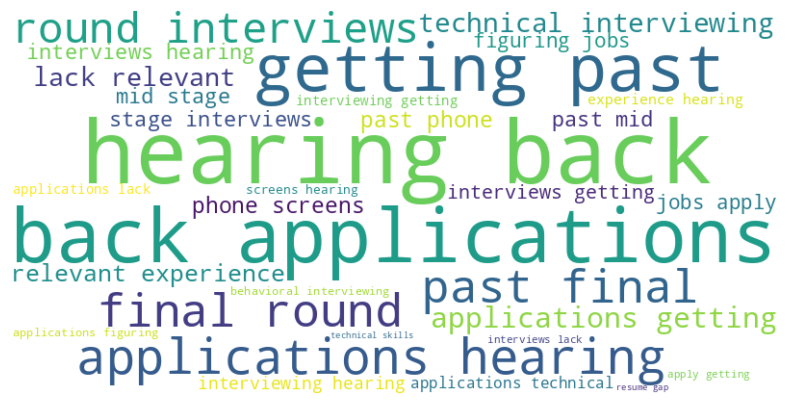

In [10]:
# Create a word cloud for the 'cleaned_biggest_challenge_in_search' column
text = ' '.join(df['cleaned_biggest_challenge_in_search'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows that the most common challenges participants face are related to "hearing back" from job applications and "getting past" interview rounds. Words like "applications," "final round," and "technical interviewing" also appear frequently, indicating that these are key concerns during the job search process.

## 3.10 Summary

The EDA of the Pathrise dataset reveals key insights into participants' job search experiences and placement success. Most placed candidates come from the Software Engineering (SWE) track, with students and full-time employed individuals having higher placement rates. Candidates with a Bachelor's or Master's degree also tend to succeed more in placements, while unemployed participants face greater challenges.

Bivariate analysis shows that non-Hispanic White and East Asian participants have higher placement rates, while Black and Latino candidates appear more often in "Closed Lost" or "Deferred" categories. Gender disparities are evident, with males having significantly higher placement rates, especially in the SWE track. Common job search challenges include hearing back from applications and getting past interviews.